In [1]:
import pandas as pd
import keras as K
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from datetime import datetime

Using TensorFlow backend.


# Task I 

## Question 1 - Describe the data

In [2]:
X_df = pd.read_csv("X.csv")
Y_df = pd.read_csv("Y.csv")
target="DispFrames"

In [3]:
X_df.head()

,Unnamed: 0,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,0,2016-11-18 10:06:54,0.04,0.13,0.04,0.0,99.79,0.0,0.0,0.0,...,173470,3734,115,27,174110,1782,27,115,1782,302982
1,1,2016-11-18 10:06:55,0.13,0.25,0.00,0.0,99.62,0.0,0.0,0.0,...,94996,1002,56,15,82824,1014,16,56,1074,143640
2,2,2016-11-18 10:06:56,0.08,0.13,0.04,0.0,99.75,0.0,0.0,0.0,...,48682,1232,40,13,56252,1154,13,40,1154,95348
3,3,2016-11-18 10:06:57,0.13,0.13,0.00,0.0,99.75,0.0,0.0,0.0,...,50088,924,29,12,42458,924,13,29,984,72866
4,4,2016-11-18 10:06:58,0.04,0.17,0.04,0.0,99.75,0.0,0.0,1.0,...,51616,1064,37,17,51682,1436,17,37,1436,89330


In [4]:
Y_df.head()

,Unnamed: 0,TimeStamp,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,DispFrames,AvgInterDispDelay
0,0,2016-11-18 10:06:54,68,0.012426,2140,1467132,0.000578,0,0,12,0.100060
1,1,2016-11-18 10:06:55,42,0.024301,1095,859056,0.000922,0,0,24,0.041709
2,2,2016-11-18 10:06:56,43,0.024022,272,162144,0.003529,0,0,24,0.041707
3,3,2016-11-18 10:06:57,42,0.021121,203,121608,0.003784,0,0,24,0.041708
4,4,2016-11-18 10:06:58,42,0.025714,69,48632,0.016348,0,0,24,0.041707


In [5]:
X = X_df[X_df.columns[2:]]
y = Y_df[target]
feat_labels = X.columns
X.shape, y.shape

((18316, 1670), (18316,))

In [6]:
## Let's visualize the target value density plot

Text(0, 0.5, 'Density')

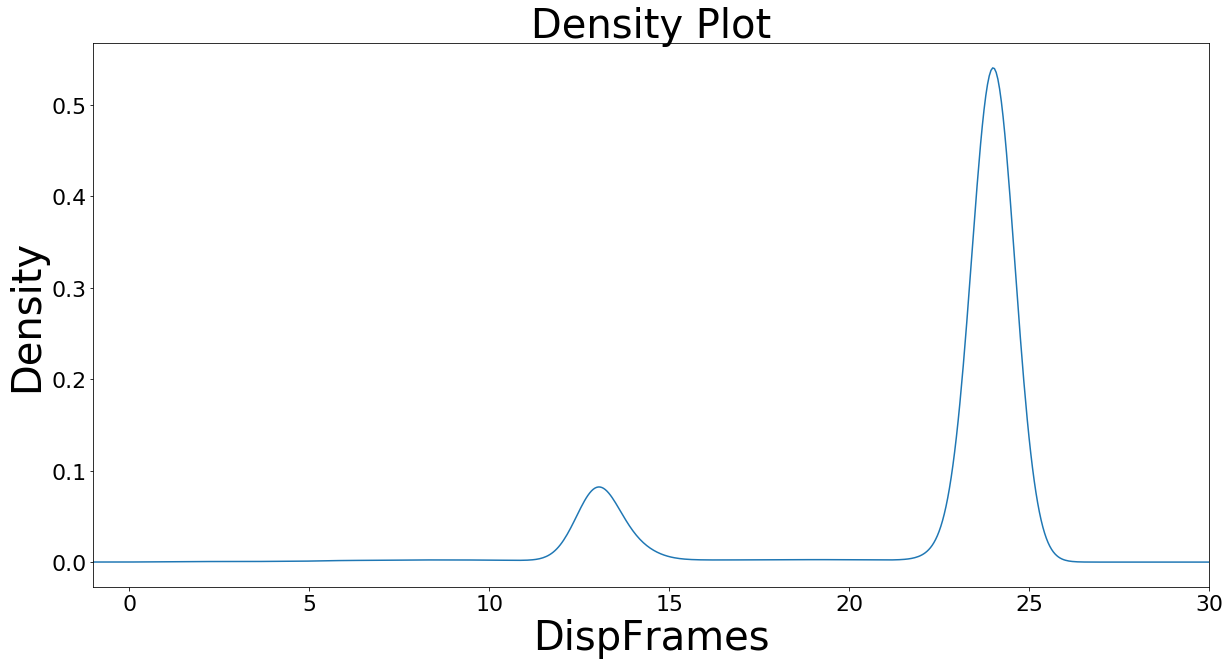

In [253]:
def plotDensity(array):
    df = pd.DataFrame(array)
    df.plot(kind='density',figsize=(20,10),legend=None)

plotDensity(y)
matplotlib.rcParams.update({'font.size': 22})

plt.title('Density Plot',fontsize=40)
plt.xlim(-1, 30)
plt.xlabel('DispFrames',fontsize=40)
plt.ylabel('Density',fontsize=40)

Text(0, 0.5, 'Count')

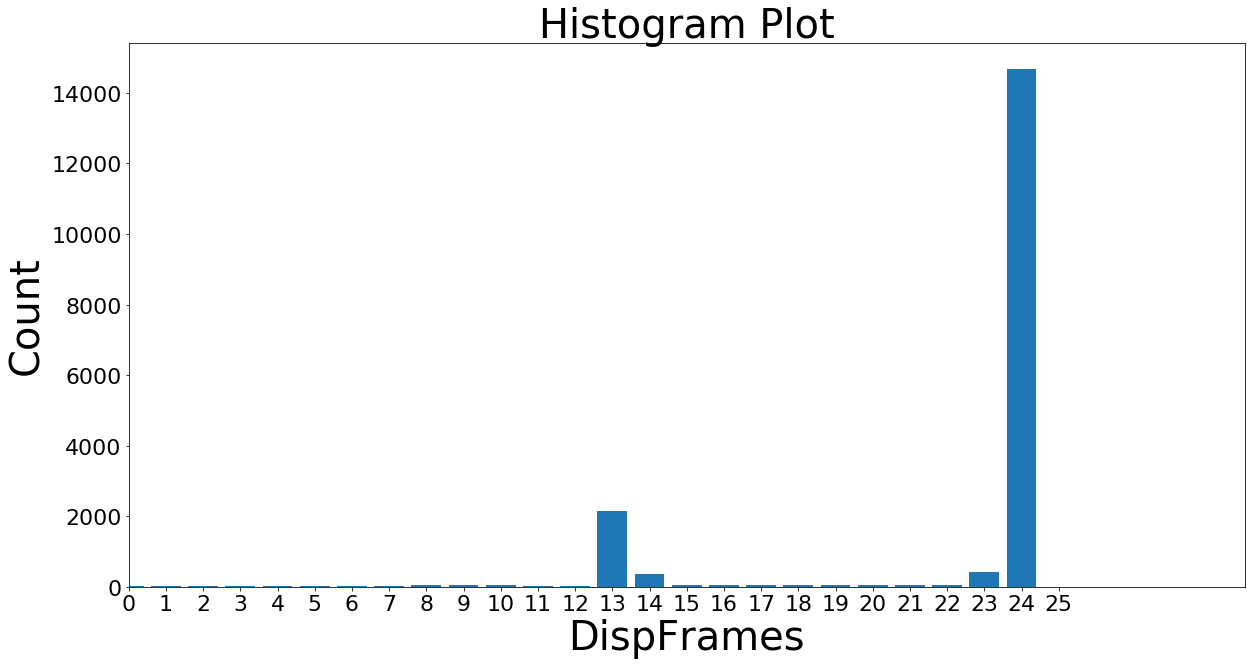

In [8]:
plt.figure(figsize=(20,10))
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.title('Histogram Plot',fontsize=40)
plt.xlim(0, 30)
plt.xlabel('DispFrames',fontsize=40)
plt.ylabel('Count',fontsize=40)

/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


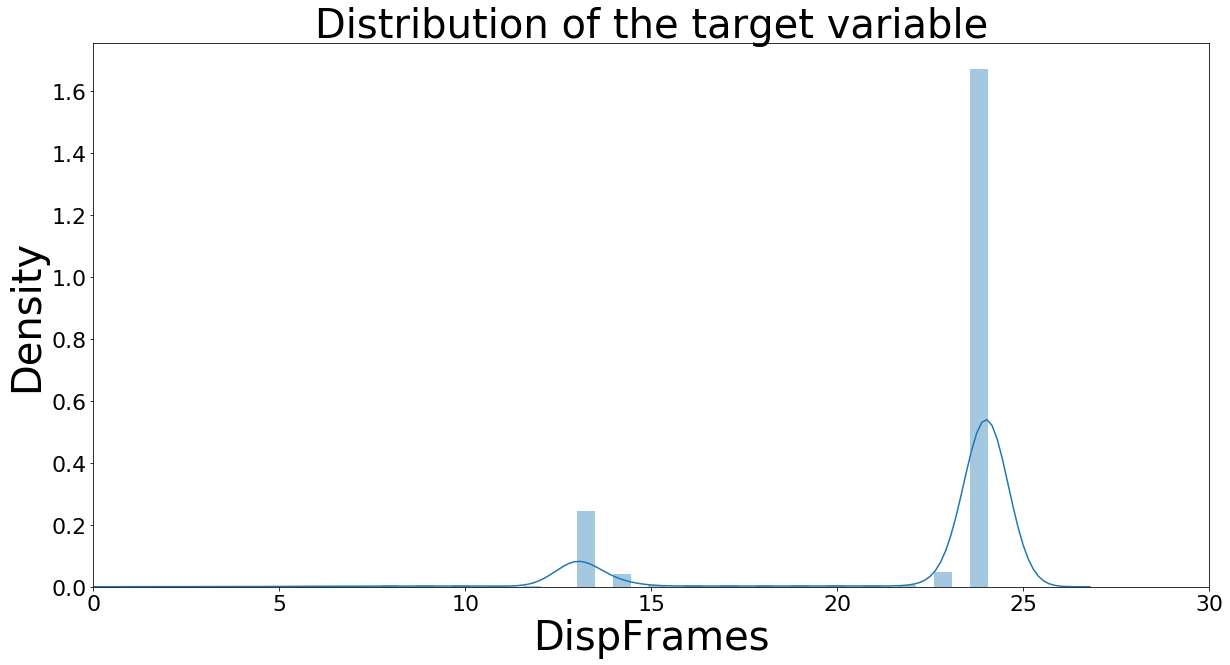

In [255]:

# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

# importing diamond dataset from the library 
# plotting histogram and density
# plot for carat using distplot()
sns.distplot(a=y)
 
plt.title('Distribution of the target variable',fontsize=40)
plt.xlim(0, 30)
plt.xlabel('DispFrames',fontsize=40)
plt.ylabel('Density',fontsize=40)
# visualizing plot using matplotlib.pyplot library
plt.show()

Text(0, 0.5, 'DispFrames')

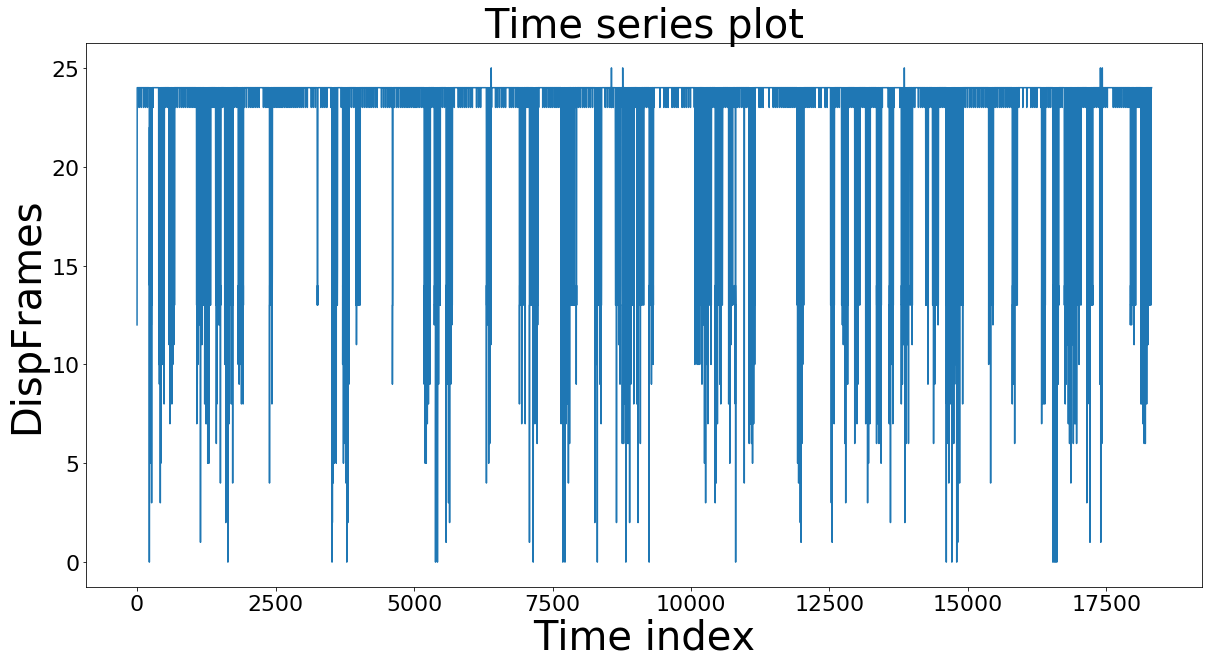

In [10]:
plt.figure(figsize=(20,10))
plt.plot(y.index, y.values)

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,'font.size': 22}

plt.rcParams.update(params)
plt.title('Time series plot', fontsize=40)
plt.xlabel('Time index',fontsize=40)
plt.ylabel('DispFrames',fontsize=40)

# Question 2 - Feature selection using tree-based method

In [11]:
def select_features(X, y, features, n_estimators=100):
    model = RandomForestClassifier(n_estimators, random_state=0, n_jobs=-1)
    model.fit(X, y)
    selector = SelectFromModel(model, max_features=16)
    selector.fit(X, y)
    features_selected = features[(selector.get_support())]
    X_features = selector.transform(X)
    return X_features, features_selected 


start = datetime.now()
X_16features, features_selected=select_features(X.values, y.values, X.columns, 100)
end = datetime.now()
print(end-start)

In [12]:
1

1

In [13]:
features_selected=['2_kbcommit', '2_file.nr', '2_ldavg.1', '3_cpu20_.idle', '3_kbcommit',
       '3_ldavg.1', '3_orq.s', '4_kbcommit', '4_X..commit', '4_file.nr',
       '4_plist.sz', '4_ldavg.1', '5_sum_intr.s', '5_irec.s', '36_TxPacktes',
       '36_TxBytes.1'] #added to avoid rerunning the code
features_selected

['2_kbcommit',
 '2_file.nr',
 '2_ldavg.1',
 '3_cpu20_.idle',
 '3_kbcommit',
 '3_ldavg.1',
 '3_orq.s',
 '4_kbcommit',
 '4_X..commit',
 '4_file.nr',
 '4_plist.sz',
 '4_ldavg.1',
 '5_sum_intr.s',
 '5_irec.s',
 '36_TxPacktes',
 '36_TxBytes.1']

In [14]:
X[features_selected].describe()

,2_kbcommit,2_file.nr,2_ldavg.1,3_cpu20_.idle,3_kbcommit,3_ldavg.1,3_orq.s,4_kbcommit,4_X..commit,4_file.nr,4_plist.sz,4_ldavg.1,5_sum_intr.s,5_irec.s,36_TxPacktes,36_TxBytes.1
count,1.831600e+04,18316.000000,18316.000000,18316.000000,1.831600e+04,18316.000000,18316.000000,1.831600e+04,18316.000000,18316.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,1.256877e+07,3881.317318,54.506781,25.182810,1.341434e+07,45.269153,3638.896332,1.359149e+07,10.214526,6030.35772,1761.741974,52.816501,10485.836631,5453.416882,2255.103407,152718.673782
std,7.633819e+06,1892.701363,28.454218,30.235685,7.623288e+06,29.859576,2572.409767,7.608923e+06,5.718400,1869.17172,734.434088,27.059678,5240.773949,3144.849032,1436.300401,96845.475456
min,6.878760e+05,1104.000000,0.000000,0.000000,1.856840e+06,0.000000,55.000000,2.024192e+06,1.520000,3216.00000,644.000000,0.560000,575.000000,56.000000,12.000000,924.000000
25%,4.771035e+06,2016.000000,27.170000,0.000000,5.928337e+06,15.150000,1082.000000,5.816373e+06,4.370000,4176.00000,1008.000000,25.590000,4924.000000,2079.000000,669.750000,45753.000000
50%,1.117081e+07,3456.000000,56.370000,6.860000,1.176379e+07,43.930000,3074.500000,1.218067e+07,9.150000,5616.00000,1619.000000,55.640000,10344.000000,5211.000000,2189.500000,148957.500000
75%,1.929277e+07,5520.000000,76.807500,52.480000,2.002396e+07,73.770000,6324.250000,2.028122e+07,15.240000,7632.00000,2410.000000,75.220000,15614.250000,8542.000000,3659.250000,247415.000000
max,3.480990e+07,9552.000000,141.070000,100.000000,3.653192e+07,112.940000,8903.000000,3.657272e+07,27.490000,11904.00000,3974.000000,114.930000,21111.000000,11946.000000,5156.000000,348815.000000


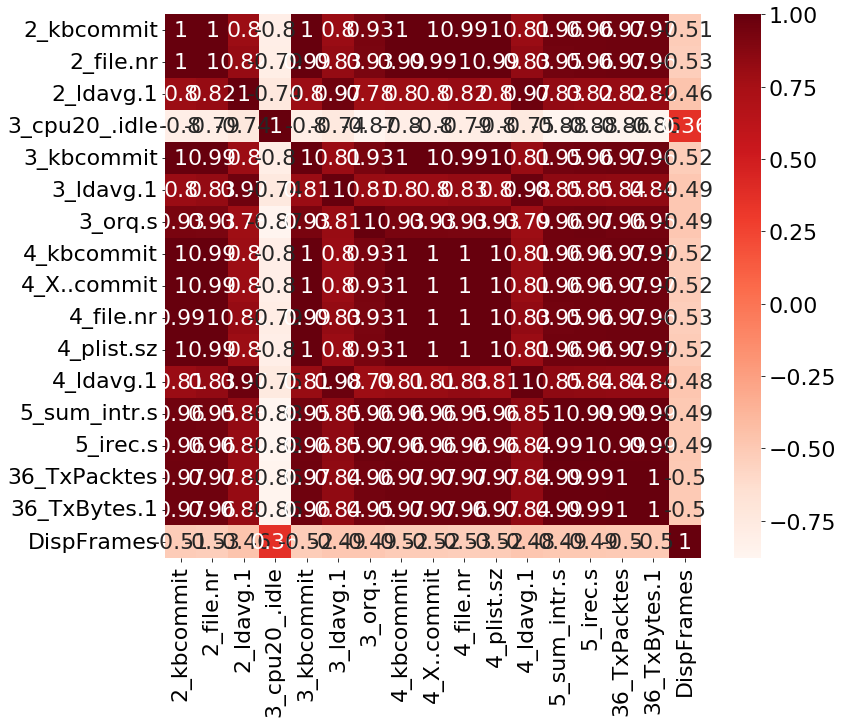

In [15]:
#Get correlations

plt.figure(figsize=(12,10))
X_corr = X_df[features_selected].copy()
X_corr[target] = y
cor =X_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Question 3 - Process X

In [16]:
from sklearn.preprocessing import normalize,  MinMaxScaler, StandardScaler
def norm_L2_column(data):
    return normalize(data,norm='l2', axis =0)
def norm_L2_row(data):
    return normalize(data,norm='l2', axis =1)
def norm_0_1_column(data):
    return MinMaxScaler().fit_transform(data)
def norm_0_1_row(data):
    return MinMaxScaler().fit_transform(data.T).T
def norm_standardized_column(data):
    return StandardScaler().fit_transform(data)
def norm_standardized_row(data):
    return StandardScaler().fit_transform(data.T).T

In [17]:
X_in = X_df[features_selected].astype(float)
X_1 = norm_L2_column(X_in)
X_2 = norm_L2_row(X_in)
X_3 = norm_0_1_column(X_in)
X_4 = norm_0_1_row(X_in)
X_5 = norm_standardized_column(X_in)
X_6 =  norm_standardized_row(X_in)

# Task II -  Estimating Service Metrics from Device Statistics

In [15]:
# Splitting dataset to training and testing

In [18]:
#Split training and test
from sklearn.model_selection import train_test_split

X_in = X_df[features_selected].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_in, y, test_size=0.3, random_state=42)

X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [19]:
import pickle
# save={'train_index':X_train.index.tolist(),'test_index':X_test.index.tolist()}
# with open('train_test.pickle','wb') as f:
#     pickle.dump( save,f,  4)
    
with open('train_test.pickle','rb') as f:
    indexes= pickle.load(f)
    
X_train = X_in[X_in.index.isin(indexes['train_index'])]
X_test = X_in[X_in.index.isin(indexes['test_index'])]
y_train = y[y.index.isin(indexes['train_index'])]
y_test = y[y.index.isin(indexes['test_index'])]

X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [20]:
#Evaluation metric
def NMAE(y_actual, y_predict):
    if type(y_actual) is not list: y_actual = list(y_actual)
    if type(y_predict) is not list: y_predict = list(y_predict)
        
    mean = np.mean(y_actual)
    return 1/(mean*len(y_actual))*sum([abs(y_actual[i] - y_predict[i]) for i in range(len(y_actual))])

### Baseline

In [21]:
from sklearn.metrics import mean_absolute_error
import time
t1 =time.time()
y_mean = round(np.mean(y_train),3)
t2 = time.time()

t3=time.time()
nmae_baseline =NMAE(y_test, [y_mean for i in range(len(y_test))])
t4= time.time()
print("Time to build/train the model ", t2-t1)
print("Time to test the model ", t4-t3)
print("Baseline :", nmae_baseline, round(nmae_baseline, 3))

Time to build/train the model  0.00047850608825683594
Time to test the model  0.00464940071105957
Baseline : 0.14289267966518865 0.143


/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


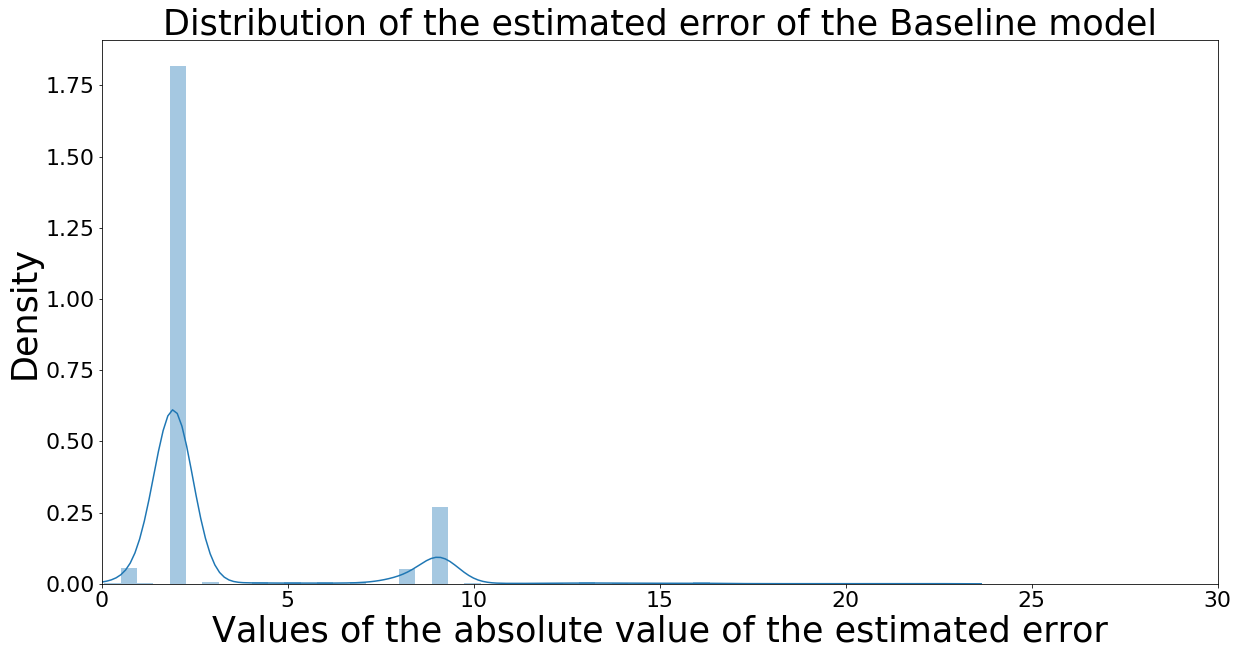

In [22]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

estimated_error_Baseline = [abs(y_mean- y_test.tolist()[i]) for i in range(len(y_test))]
sns.distplot(estimated_error_Baseline).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Distribution of the estimated error of the Baseline model',fontsize=35)
plt.xlabel('Values of the absolute value of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

plt.show()

### Linear regression

In [20]:
from  sklearn.linear_model import LinearRegression
t1 =time.time()
LR = LinearRegression(n_jobs=-1).fit(X_train, y_train)
t2 =time.time()

# # print(LR.score(X_train, y_train))
# print(LR.coef_)
# print(LR.intercept_)
t3 =time.time()
y_pred_LR = [round(a, 3) for a in LR.predict(X_test)]
t4 =time.time()

nmae_LR = NMAE(y_test, y_pred_LR)
print("Time to build/train the model ", t2-t1)
print("Time to test the model ", t4-t3)
print("Linear regression :", nmae_LR, round(nmae_LR, 3))

Time to build/train the model  0.014859676361083984
Time to test the model  0.07902121543884277
Linear regression : 0.10777700549768056 0.108


### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  make_scorer
score = make_scorer(NMAE, greater_is_better=False) #metric to optimize

#First Random Grid Search

n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt'] 
max_depth = [10, 40, 70, 100, None]
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4] 
bootstrap = [True, False]

# Create the random grid
random_grid = {
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [21]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,  cv = 4, verbose=2, random_state=42, n_jobs = -1, scoring =score)
# Fit the random search model with 4 fold cross validation
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


KeyboardInterrupt: 

In [122]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

 params ={'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [123]:
#Second random grid
params ={'n_estimators': [200, 300, 400, 500],
 'min_samples_split': [2,3],
 'min_samples_leaf': [1],
 'max_features': ['sqrt'],
 'max_depth': [30,40,50],
 'bootstrap': [False]}



rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,  cv = 4, verbose=2, random_state=42, n_jobs = -1, scoring =score)
# Fit the random search model with 4 fold cross validation
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  15.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  16.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  15.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  16.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=  15.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=  24.1s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=  23.4s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=  24.0s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=  22.3s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.2min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 300, 400, 500], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'max_features': ['sqrt'], 'max_depth': [30, 40, 50], 'bootstrap': [False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scoring=make_scorer(NMAE, greater_is_better=False), verbose=2)

In [125]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [32]:
rf = RandomForestRegressor(n_estimators= 200,
                             min_samples_split=2,
                             min_samples_leaf= 1,
                             max_features='sqrt',
                             max_depth= 50,
                             bootstrap= False, n_jobs=-1)


t1 = time.time()
rf.fit(X_train, y_train)
t2 = time.time()
print("Time to build/train the model ", t2-t1)


Time to build/train the model  21.25061845779419


In [33]:
t3 = time.time()
y_pred_RF = rf.predict(X_test)
t4 = time.time()
print("Time to test the model ", t4-t3)

nmae_RF = NMAE(y_test, y_pred_RF)
print("Random Forest Regressor :", nmae_RF, round(nmae_RF, 4))

Time to test the model  0.2665519714355469
Random Forest Regressor : 0.06563981263160863 0.0656


In [128]:
# Time series plot

Text(0, 0.5, 'DispFrames')

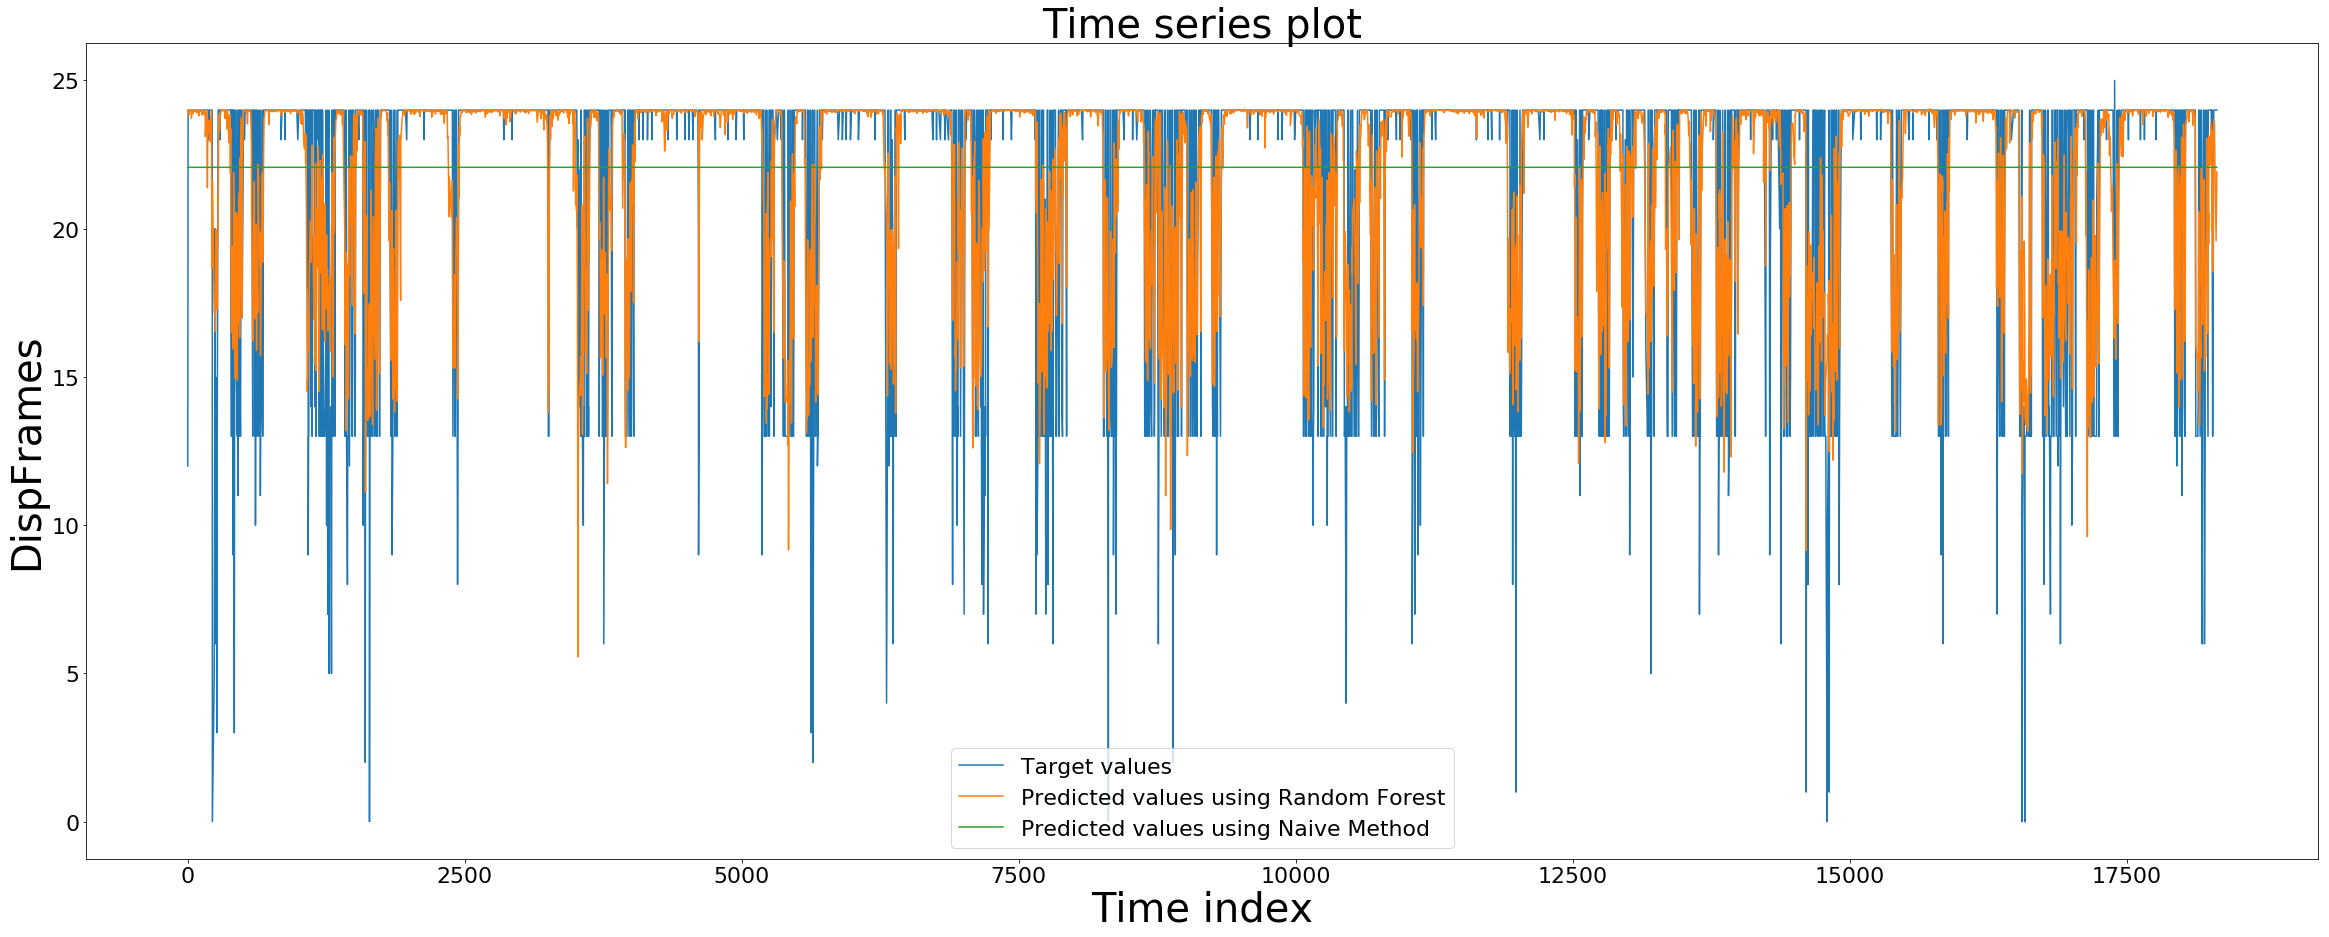

In [34]:
plt.figure(figsize=(40,15))
x_values = y_test.index
plt.plot(x_values, y_test.values)

plt.plot(x_values, y_pred_RF)
plt.plot(x_values, [y_mean for i in range(len(y_test))])
plt.legend(['Target values', 'Predicted values using Random Forest', 'Predicted values using Naive Method'])
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,'font.size': 22}

plt.rcParams.update(params)
plt.title('Time series plot', fontsize=40)
plt.xlabel('Time index',fontsize=40)
plt.ylabel('DispFrames',fontsize=40)

In [130]:
# Density of estimated error 

Text(0, 0.5, 'Density')

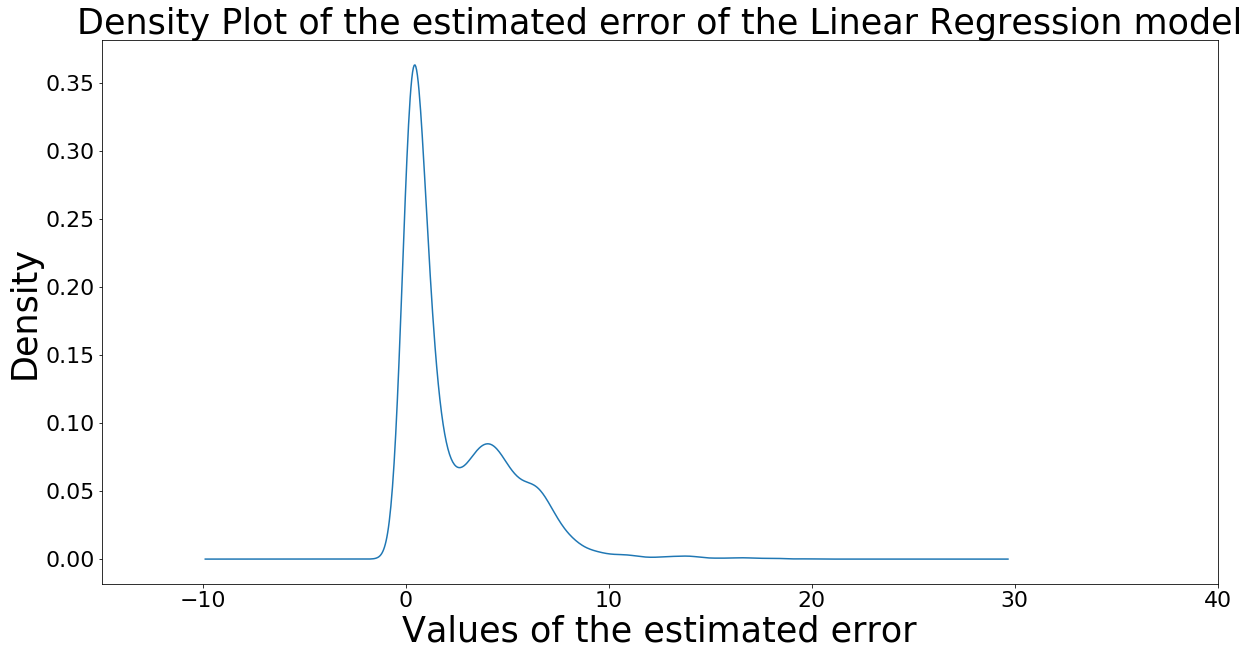

In [23]:
estimated_error_LR = [abs(y_test.tolist()[i] - y_pred_LR[i]) for i in range(len(y_test)) ]
plotDensity(estimated_error_LR)
matplotlib.rcParams.update({'font.size': 22})
plt.xlim(-15,40)

plt.title('Density Plot of the estimated error of the Linear Regression model',fontsize=35)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

Text(0, 0.5, 'Counts')

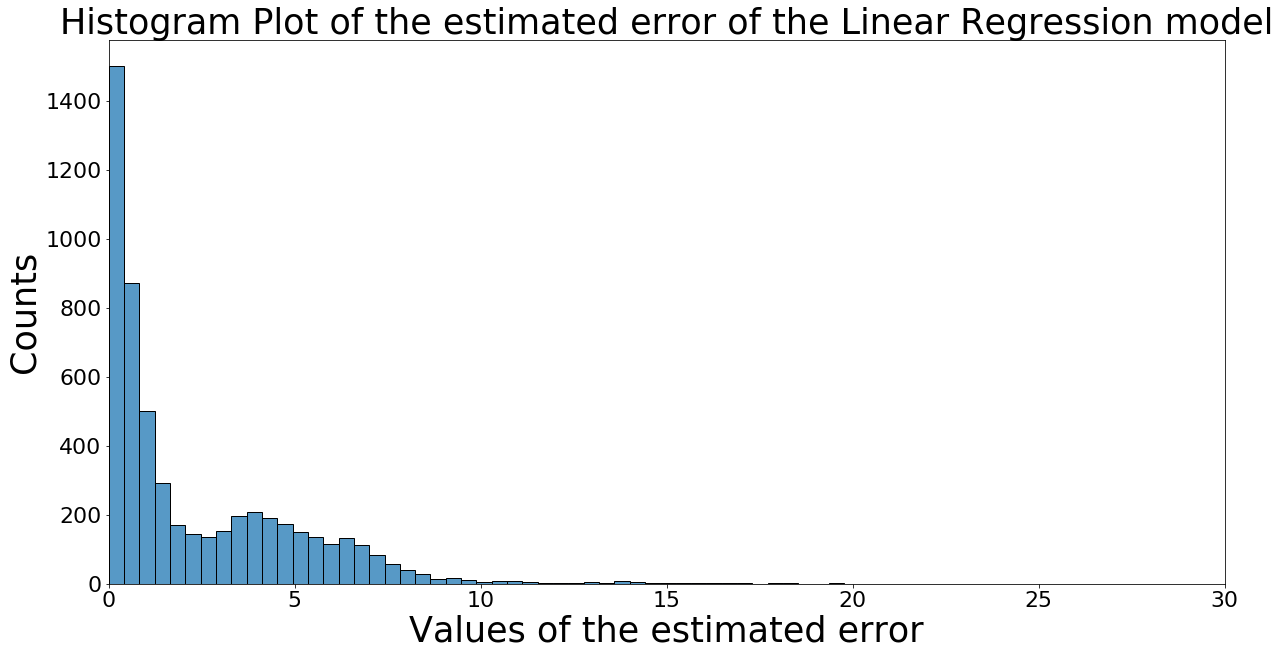

In [24]:
plt.figure(figsize=(20,10))
sns.histplot(estimated_error_LR).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Histogram Plot of the estimated error of the Linear Regression model',fontsize=35)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Counts',fontsize=35)

/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


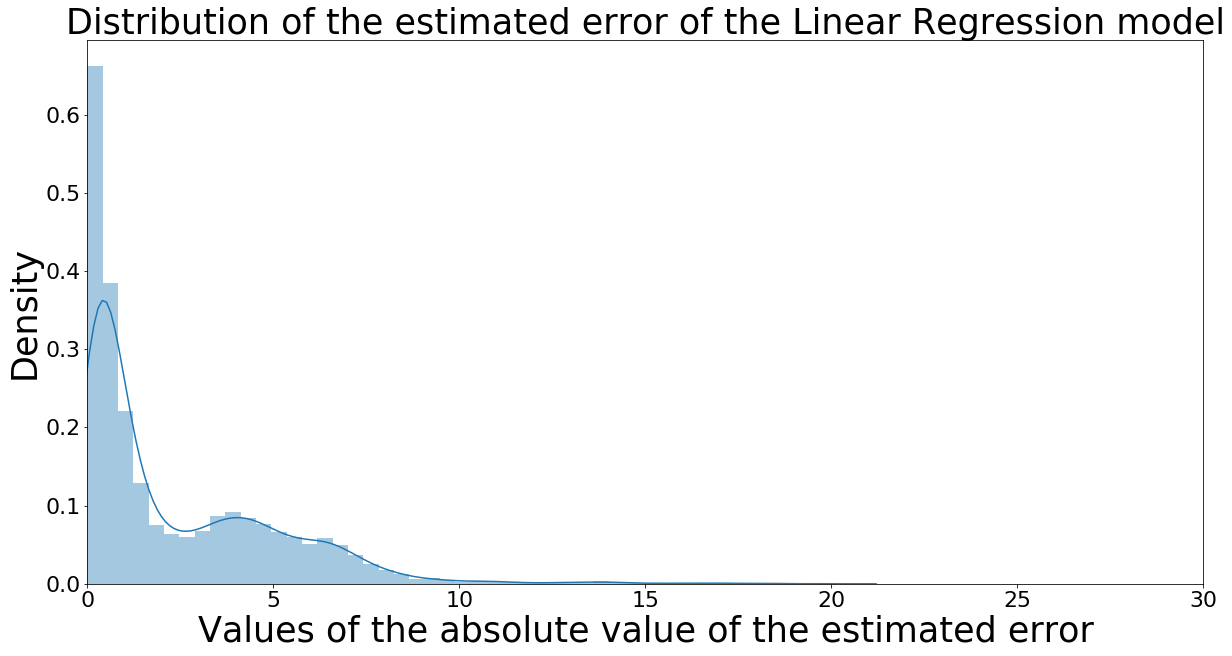

In [25]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

sns.distplot(estimated_error_LR).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Distribution of the estimated error of the Linear Regression model',fontsize=35)
plt.xlabel('Values of the absolute value of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

plt.show()

Text(0, 0.5, 'Density')

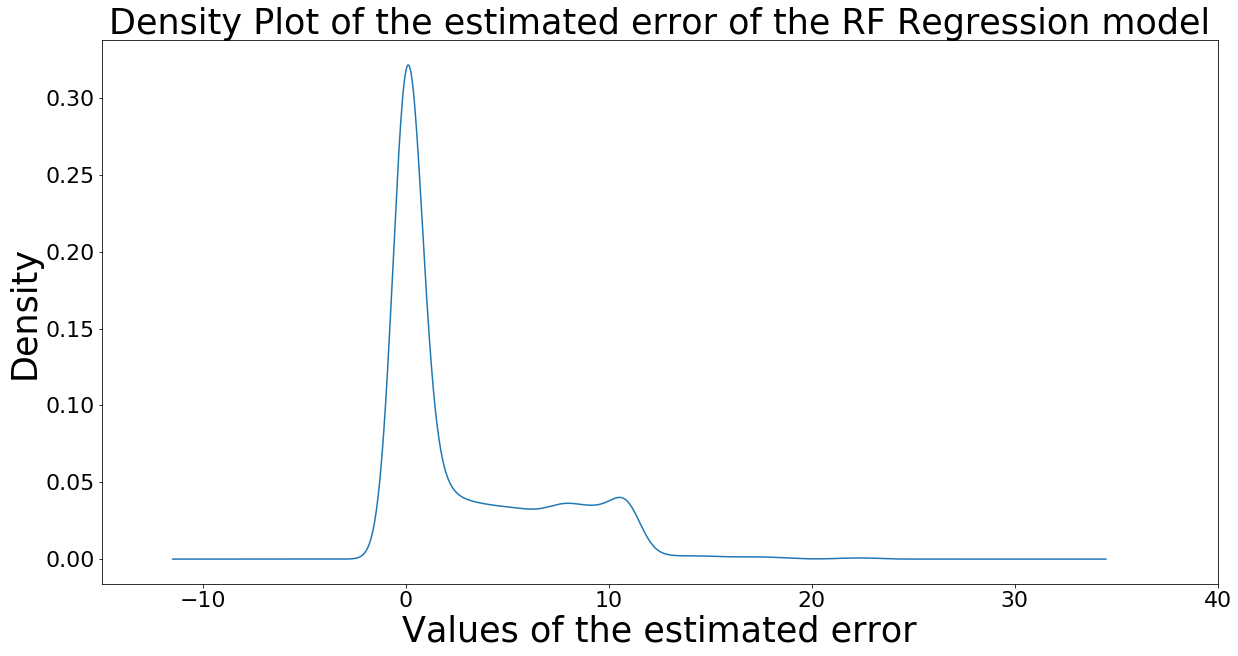

In [667]:
estimated_error_RF = [abs(y_test.tolist()[i] - y_pred_RF[i]) for i in range(len(y_test)) ]
plotDensity(estimated_error_RF)
matplotlib.rcParams.update({'font.size': 22})
plt.title('Density Plot of the estimated error of the RF Regression model',fontsize=35)
plt.xlim(-15,40)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)


Text(0, 0.5, 'Counts')

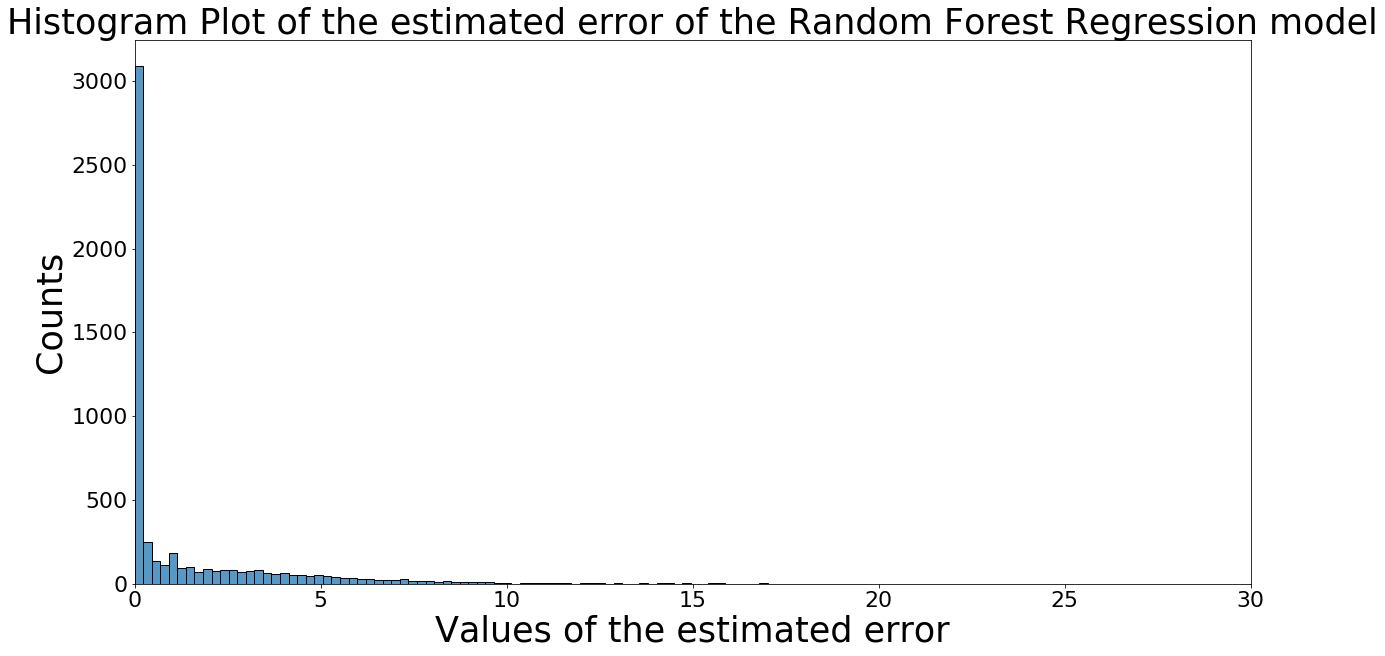

In [38]:
plt.figure(figsize=(20,10))
sns.histplot(estimated_error_RF).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})
plt.title('Histogram Plot of the estimated error of the Random Forest Regression model',fontsize=35)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Counts',fontsize=35)

/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


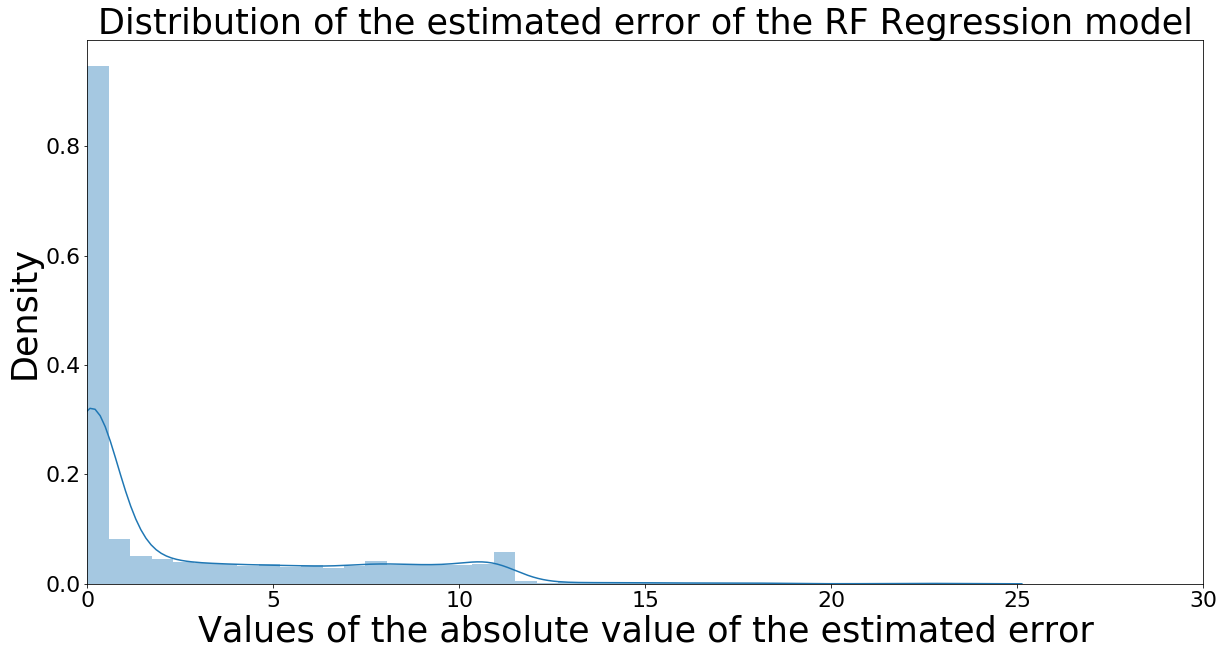

In [668]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

sns.distplot(estimated_error_RF).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Distribution of the estimated error of the RF Regression model',fontsize=35)
plt.xlabel('Values of the absolute value of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

plt.show()

# Work done in second week

## Neural Network

In [24]:
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def createmodel(n_layers, n_nodes, learning_rate):
    model = Sequential()

    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(n_nodes, input_dim=16, activation='sigmoid'))
        else:
            model.add(Dense(n_nodes, activation='sigmoid'))
            
    #Finally, the output layer should have a single node in binary classification
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mean_absolute_error',metrics=['accuracy', K.metrics.MeanAbsoluteError(name='mae')]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn

#param_grid = dict(learning_rate =[0.1, 0.001, 0.0001], n_layers=[2,3,4], n_nodes=[5,10,20,40],  batch_size = [10, 40, 50, 70, 100], epochs = [10, 20,60])


In [23]:
#First, set learning rate
param_grid = dict(learning_rate =[0.1, 0.01, 0.001, 0.0001], n_layers=[2], n_nodes=[20], batch_size = [20], epochs = [10])

model =  KerasClassifier(build_fn=createmodel, verbose = True)
grid = GridSearchCV(estimator=model,
             param_grid= param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
#grid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=20, epochs=10, learning_rate=0.1, n_layers=2, n_nodes=20 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.



Epoch 1/10
6410/6410 [==============================] - 1s 193us/step - loss: 3.1714 - accuracy: 0.6594 - mae: 3.1714
Epoch 2/10
5240/6410 [=======================>......] - ETA: 0s - loss: 2.0940 - accuracy: 0.7735 - mae: 2.0940

KeyboardInterrupt: 

In [29]:
print(grid.best_params_)
#we fix the learning_rate to be 0.1

{'batch_size': 20, 'epochs': 10, 'learning_rate': 0.1, 'n_layers': 2, 'n_nodes': 20}


In [39]:
#Number of epochs
#First, set learning rate
param_grid = dict(learning_rate =[0.1], n_layers=[2], n_nodes=[20], batch_size = [20], epochs = [10, 20, 40, 60])
model =  KerasClassifier(build_fn=createmodel, verbose = True)
grid = GridSearchCV(estimator=model,
             param_grid= param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
#grid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=20, epochs=10, learning_rate=0.1, n_layers=2, n_nodes=20 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
6410/6410 [==============================] - 2s 274us/step - loss: 2.7862 - accuracy: 0.6573 - mae: 2.7862
Epoch 2/10
6410/6410 [==============================] - 1s 136us/step - loss: 2.1945 - accuracy: 0.7131 - mae: 2.1945
Epoch 3/10
6410/6410 [==============================] - 1s 132us/step - loss: 2.1920 - accuracy: 0.7218 - mae: 2.1919
Epoch 4/10
6410/6410 [==============================] - 1s 132us/step - loss: 2.1751 - accuracy: 0.7471 - mae: 2.1751
Epoch 5/10
6410/6410 [==============================] - 1s 134us/step - loss: 2.2008 - accuracy: 0.7080 - mae: 2.2008
Epoch 6/10
6410/6410 [==============================] - 1s 131us/step - loss: 2.1956 - accuracy: 0.7335 - mae: 2.1956
Epoch 7/10
6410/6410 [==============================] - 1s 131us/step - loss: 2.1696 - accuracy: 0.7633 - mae: 2.1696
Epoch 8/10
6410/6410 [==============================] - 1s 130us/step - loss: 2.1824 - accuracy: 0.7435 - mae: 2.1824
Epoch 9/10
6410/6410 [==============================] - 

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


Epoch 1/10
6411/6411 [==============================] - 2s 279us/step - loss: 2.7939 - accuracy: 0.6230 - mae: 2.7939
Epoch 2/10
6411/6411 [==============================] - 1s 147us/step - loss: 1.9651 - accuracy: 0.7668 - mae: 1.9651
Epoch 3/10
6411/6411 [==============================] - 1s 148us/step - loss: 1.9561 - accuracy: 0.7673 - mae: 1.9561
Epoch 4/10
6411/6411 [==============================] - 1s 148us/step - loss: 1.9202 - accuracy: 0.7921 - mae: 1.9202
Epoch 5/10
6411/6411 [==============================] - 1s 149us/step - loss: 1.9301 - accuracy: 0.7983 - mae: 1.9301
Epoch 6/10
6411/6411 [==============================] - 1s 148us/step - loss: 1.9090 - accuracy: 0.8016 - mae: 1.9090
Epoch 7/10
6411/6411 [==============================] - 1s 149us/step - loss: 1.9155 - accuracy: 0.7907 - mae: 1.9155
Epoch 8/10
6411/6411 [==============================] - 1s 148us/step - loss: 1.9225 - accuracy: 0.7932 - mae: 1.9225
Epoch 9/10
6411/6411 [==============================] - 

6410/6410 [==============================] - 1s 151us/step - loss: 2.1426 - accuracy: 0.7813 - mae: 2.1426
Epoch 14/40
6410/6410 [==============================] - 1s 150us/step - loss: 2.1517 - accuracy: 0.7674 - mae: 2.1517
Epoch 15/40
6410/6410 [==============================] - 1s 150us/step - loss: 2.1478 - accuracy: 0.7771 - mae: 2.1478
Epoch 16/40
6410/6410 [==============================] - 1s 149us/step - loss: 2.1425 - accuracy: 0.7780 - mae: 2.1425
Epoch 17/40
6410/6410 [==============================] - 1s 150us/step - loss: 2.1117 - accuracy: 0.7911 - mae: 2.1117
Epoch 18/40
6410/6410 [==============================] - 1s 150us/step - loss: 2.1386 - accuracy: 0.7760 - mae: 2.1386
Epoch 19/40
6410/6410 [==============================] - 1s 150us/step - loss: 2.1407 - accuracy: 0.7892 - mae: 2.1407
Epoch 20/40
6410/6410 [==============================] - 1s 149us/step - loss: 2.1360 - accuracy: 0.7736 - mae: 2.1360
Epoch 21/40
6410/6410 [==============================] - 1s 

6411/6411 [==============================] - 1s 149us/step - loss: 1.9773 - accuracy: 0.7615 - mae: 1.9773
Epoch 4/60
6411/6411 [==============================] - 1s 150us/step - loss: 1.9358 - accuracy: 0.7855 - mae: 1.9358
Epoch 5/60
6411/6411 [==============================] - 1s 149us/step - loss: 1.9319 - accuracy: 0.8022 - mae: 1.9319
Epoch 6/60
6411/6411 [==============================] - 1s 149us/step - loss: 1.9417 - accuracy: 0.7763 - mae: 1.9417
Epoch 7/60
6411/6411 [==============================] - 1s 149us/step - loss: 1.9199 - accuracy: 0.8063 - mae: 1.9199
Epoch 8/60
6411/6411 [==============================] - 1s 148us/step - loss: 1.9583 - accuracy: 0.7769 - mae: 1.9583
Epoch 9/60
6411/6411 [==============================] - 1s 148us/step - loss: 1.9258 - accuracy: 0.7854 - mae: 1.9258
Epoch 10/60
6411/6411 [==============================] - 1s 149us/step - loss: 1.9408 - accuracy: 0.7879 - mae: 1.9408
Epoch 11/60
6411/6411 [==============================] - 1s 149us/

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.1min finished


Epoch 1/10
12821/12821 [==============================] - 3s 228us/step - loss: 2.4404 - accuracy: 0.7000 - mae: 2.4404
Epoch 2/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0546 - accuracy: 0.7797 - mae: 2.0546
Epoch 3/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0453 - accuracy: 0.7661 - mae: 2.0453
Epoch 4/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0525 - accuracy: 0.7827 - mae: 2.0525
Epoch 5/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0524 - accuracy: 0.7761 - mae: 2.0524
Epoch 6/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0319 - accuracy: 0.7921 - mae: 2.0319
Epoch 7/10
12821/12821 [==============================] - 2s 157us/step - loss: 2.0319 - accuracy: 0.7905 - mae: 2.0319
Epoch 8/10
12821/12821 [==============================] - 2s 156us/step - loss: 2.0216 - accuracy: 0.7966 - mae: 2.0216
Epoch 9/10
12821/12821 [================

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6858a5d550>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1], 'n_layers': [2], 'n_nodes': [20], 'batch_size': [20], 'epochs': [10, 20, 40, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(NMAE, greater_is_better=False), verbose=2)

In [40]:
print(grid.best_params_)
#we fix the number of epochs to be 20

{'batch_size': 20, 'epochs': 10, 'learning_rate': 0.1, 'n_layers': 2, 'n_nodes': 20}


In [45]:
#Optimize jointly the architecture
#assume that all layers have same number of nodes
param_grid = dict(learning_rate =[0.1], n_layers=[2], n_nodes=[20], batch_size = [1, 5, 10, 20, 40], epochs = [ 20])
model =  KerasClassifier(build_fn=createmodel, verbose = True)
grid = GridSearchCV(estimator=model,
             param_grid= param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] batch_size=1, epochs=20, learning_rate=0.1, n_layers=2, n_nodes=20 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2809 - accuracy: 0.6621 - mae: 2.2809
Epoch 2/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2461 - accuracy: 0.6585 - mae: 2.2461
Epoch 3/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2403 - accuracy: 0.6682 - mae: 2.2403
Epoch 4/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2489 - accuracy: 0.6518 - mae: 2.2489
Epoch 5/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2374 - accuracy: 0.6691 - mae: 2.2374
Epoch 6/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2444 - accuracy: 0.6594 - mae: 2.2444
Epoch 7/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2549 - accuracy: 0.6544 - mae: 2.2549
Epoch 8/20
6410/6410 [==============================] - 18s 3ms/step - loss: 2.2474 - accuracy: 0.6632 - mae: 2.2474
Epoch 9/20
6410/6410 [==============================] - 18s 3ms/

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


Epoch 1/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.1703 - accuracy: 0.5695 - mae: 2.1703
Epoch 2/20
6411/6411 [==============================] - 17s 3ms/step - loss: 2.1311 - accuracy: 0.5735 - mae: 2.1311
Epoch 3/20
6411/6411 [==============================] - 18s 3ms/step - loss: 2.1077 - accuracy: 0.5857 - mae: 2.1077
Epoch 4/20
6411/6411 [==============================] - 17s 3ms/step - loss: 2.0974 - accuracy: 0.6097 - mae: 2.0974
Epoch 5/20
6411/6411 [==============================] - 18s 3ms/step - loss: 2.0967 - accuracy: 0.6074 - mae: 2.0967
Epoch 6/20
6411/6411 [==============================] - 17s 3ms/step - loss: 2.1285 - accuracy: 0.5749 - mae: 2.1285
Epoch 7/20
6411/6411 [==============================] - 17s 3ms/step - loss: 2.1120 - accuracy: 0.5846 - mae: 2.1120
Epoch 8/20
6411/6411 [==============================] - 17s 3ms/step - loss: 2.0912 - accuracy: 0.6116 - mae: 2.0912
Epoch 9/20
6411/6411 [==============================] - 17s 3ms/

6411/6411 [==============================] - 1s 189us/step - loss: 1.9690 - accuracy: 0.7442 - mae: 1.9690
Epoch 6/20
6411/6411 [==============================] - 1s 190us/step - loss: 1.9656 - accuracy: 0.7620 - mae: 1.9656
Epoch 7/20
6411/6411 [==============================] - 1s 188us/step - loss: 1.9797 - accuracy: 0.7433 - mae: 1.9797
Epoch 8/20
6411/6411 [==============================] - 1s 189us/step - loss: 1.9553 - accuracy: 0.7868 - mae: 1.9553
Epoch 9/20
6411/6411 [==============================] - 1s 189us/step - loss: 1.9452 - accuracy: 0.7642 - mae: 1.9452
Epoch 10/20
6411/6411 [==============================] - 1s 189us/step - loss: 1.9715 - accuracy: 0.7562 - mae: 1.9715
Epoch 11/20
6411/6411 [==============================] - 1s 189us/step - loss: 1.9758 - accuracy: 0.7415 - mae: 1.9758
Epoch 12/20
6411/6411 [==============================] - 1s 188us/step - loss: 1.9360 - accuracy: 0.7810 - mae: 1.9360
Epoch 13/20
6411/6411 [==============================] - 1s 189u

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 21.0min finished


Epoch 1/20
12821/12821 [==============================] - 39s 3ms/step - loss: 2.1864 - accuracy: 0.6365 - mae: 2.1864
Epoch 2/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1507 - accuracy: 0.6537 - mae: 2.1507
Epoch 3/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1502 - accuracy: 0.6541 - mae: 2.1502
Epoch 4/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1399 - accuracy: 0.6570 - mae: 2.1399
Epoch 5/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1376 - accuracy: 0.6699 - mae: 2.1376
Epoch 6/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1353 - accuracy: 0.6734 - mae: 2.1353
Epoch 7/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1399 - accuracy: 0.6670 - mae: 2.1399
Epoch 8/20
12821/12821 [==============================] - 37s 3ms/step - loss: 2.1293 - accuracy: 0.6775 - mae: 2.1293
Epoch 9/20
12821/12821 [========================

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f683d2a4e80>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1], 'n_layers': [2], 'n_nodes': [20], 'batch_size': [1, 5, 10, 20, 40], 'epochs': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(NMAE, greater_is_better=False), verbose=2)

In [47]:
print(grid.best_params_)
#we fix the batch size to be 20

{'batch_size': 1, 'epochs': 20, 'learning_rate': 0.1, 'n_layers': 2, 'n_nodes': 20}


In [48]:
#Optimize jointly the architecture
#assume that all layers have same number of nodes
param_grid = dict(learning_rate =[0.1], n_layers=[2, 3, 4], n_nodes=[10, 20, 30], batch_size = [1], epochs = [ 20])
model =  KerasClassifier(build_fn=createmodel, verbose = True)
grid = GridSearchCV(estimator=model,
             param_grid= param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
# grid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv=2, verbose=2, n_jobs =-1,scoring =score)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] batch_size=1, epochs=20, learning_rate=0.1, n_layers=2, n_nodes=10 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/20
6410/6410 [==============================] - 20s 3ms/step - loss: 2.3045 - accuracy: 0.6828 - mae: 2.3045
Epoch 2/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2258 - accuracy: 0.6780 - mae: 2.2258
Epoch 3/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2177 - accuracy: 0.6841 - mae: 2.2177
Epoch 4/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2190 - accuracy: 0.6908 - mae: 2.2190
Epoch 5/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2381 - accuracy: 0.6649 - mae: 2.2381
Epoch 6/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2367 - accuracy: 0.6637 - mae: 2.2367
Epoch 7/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2301 - accuracy: 0.6679 - mae: 2.2301
Epoch 8/20
6410/6410 [==============================] - 19s 3ms/step - loss: 2.2174 - accuracy: 0.6885 - mae: 2.2174
Epoch 9/20
6410/6410 [==============================] - 19s 3ms/

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  7.1min remaining:    0.0s


Epoch 1/20
6411/6411 [==============================] - 20s 3ms/step - loss: 2.1219 - accuracy: 0.6264 - mae: 2.1219
Epoch 2/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0572 - accuracy: 0.6246 - mae: 2.0572
Epoch 3/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0619 - accuracy: 0.6222 - mae: 2.0619
Epoch 4/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0545 - accuracy: 0.6331 - mae: 2.0545
Epoch 5/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0677 - accuracy: 0.6077 - mae: 2.0677
Epoch 6/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0302 - accuracy: 0.6640 - mae: 2.0302
Epoch 7/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0458 - accuracy: 0.6469 - mae: 2.0458
Epoch 8/20
6411/6411 [==============================] - 19s 3ms/step - loss: 2.0549 - accuracy: 0.6308 - mae: 2.0549
Epoch 9/20
6411/6411 [==============================] - 19s 3ms/

6411/6411 [==============================] - 21s 3ms/step - loss: 2.0232 - accuracy: 0.6846 - mae: 2.0232
Epoch 6/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0332 - accuracy: 0.6690 - mae: 2.0332
Epoch 7/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0195 - accuracy: 0.6927 - mae: 2.0195
Epoch 8/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0151 - accuracy: 0.6826 - mae: 2.0151
Epoch 9/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0073 - accuracy: 0.7008 - mae: 2.0073
Epoch 10/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0231 - accuracy: 0.6791 - mae: 2.0231
Epoch 11/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0243 - accuracy: 0.6802 - mae: 2.0243
Epoch 12/20
6411/6411 [==============================] - 21s 3ms/step - loss: 2.0163 - accuracy: 0.6974 - mae: 2.0163
Epoch 13/20
6411/6411 [==============================] - 21s 3ms/step - 

6411/6411 [==============================] - 23s 4ms/step - loss: 1.9744 - accuracy: 0.7411 - mae: 1.9744
Epoch 10/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9887 - accuracy: 0.7219 - mae: 1.9887
Epoch 11/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9772 - accuracy: 0.7344 - mae: 1.9772
Epoch 12/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9750 - accuracy: 0.7336 - mae: 1.9750
Epoch 13/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9754 - accuracy: 0.7350 - mae: 1.9754
Epoch 14/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9843 - accuracy: 0.7280 - mae: 1.9843
Epoch 15/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9827 - accuracy: 0.7247 - mae: 1.9827
Epoch 16/20
6411/6411 [==============================] - 23s 4ms/step - loss: 1.9899 - accuracy: 0.7116 - mae: 1.9899
Epoch 17/20
6411/6411 [==============================] - 23s 4ms/ste

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 140.3min finished


Epoch 1/20
12821/12821 [==============================] - 46s 4ms/step - loss: 2.1609 - accuracy: 0.6722 - mae: 2.1609
Epoch 2/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1429 - accuracy: 0.6592 - mae: 2.1430
Epoch 3/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1365 - accuracy: 0.6693 - mae: 2.1365
Epoch 4/20
12821/12821 [==============================] - 45s 3ms/step - loss: 2.1377 - accuracy: 0.6713 - mae: 2.1377
Epoch 5/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1267 - accuracy: 0.6746 - mae: 2.1267
Epoch 6/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1119 - accuracy: 0.6977 - mae: 2.1119
Epoch 7/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1311 - accuracy: 0.6765 - mae: 2.1311
Epoch 8/20
12821/12821 [==============================] - 44s 3ms/step - loss: 2.1424 - accuracy: 0.6597 - mae: 2.1424
Epoch 9/20
12821/12821 [========================

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6839e107b8>,
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1], 'n_layers': [2, 3, 4], 'n_nodes': [10, 20, 30], 'batch_size': [1], 'epochs': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(NMAE, greater_is_better=False), verbose=2)

In [49]:
print(grid.best_params_)
#we fix the architecture to be: 

{'batch_size': 1, 'epochs': 20, 'learning_rate': 0.1, 'n_layers': 2, 'n_nodes': 10}


In [48]:
params ={'batch_size': 1, 'epochs': 20, 'learning_rate': 0.1, 'n_layers': 2, 'n_nodes': 10}
model =createmodel(2, 10, 0.1)
t1= time.time()
model.fit(X_train, y_train, batch_size=1, epochs=20, validation_split=0.2, workers=-1)
t2= time.time()
print("Training time ", (t2-t1))


Train on 10256 samples, validate on 2565 samples
Epoch 1/20
10256/10256 [==============================] - 20s 2ms/step - loss: 1.9857 - accuracy: 0.7764 - mae: 1.9857 - val_loss: 2.3499 - val_accuracy: 0.7669 - val_mae: 2.3499
Epoch 2/20
10256/10256 [==============================] - 20s 2ms/step - loss: 1.9325 - accuracy: 0.7798 - mae: 1.9325 - val_loss: 2.4330 - val_accuracy: 0.7669 - val_mae: 2.4330
Epoch 3/20
10256/10256 [==============================] - 20s 2ms/step - loss: 1.9303 - accuracy: 0.7804 - mae: 1.9303 - val_loss: 2.5232 - val_accuracy: 0.7669 - val_mae: 2.5232
Epoch 4/20
10256/10256 [==============================] - 20s 2ms/step - loss: 1.9323 - accuracy: 0.7788 - mae: 1.9323 - val_loss: 2.3636 - val_accuracy: 0.7669 - val_mae: 2.3636
Epoch 5/20
10256/10256 [==============================] - 20s 2ms/step - loss: 1.9333 - accuracy: 0.7819 - mae: 1.9334 - val_loss: 2.6214 - val_accuracy: 0.0222 - val_mae: 2.6214
Epoch 6/20
10256/10256 [==============================]

In [49]:
y_pred_NN =model.predict(X_test).flatten()
nmae_nn_train = (NMAE(model.predict(X_train).flatten(), y_train.tolist()))
t3 = time.time()
y_pred_NN = [round(a, 3) for a in y_pred_NN.flatten()]
t4= time.time()

nmae_nn_test = (NMAE(y_pred_NN, y_test.tolist()))
print("NMAE on training set ", nmae_nn_train,round(nmae_nn_train, 4))
print("Testing time ", (t4-t3))
print("NMAE on testing set ", nmae_nn_test, round(nmae_nn_test, 4))

NMAE on training set  0.08647440274107075 0.0865
Testing time  0.10114765167236328
NMAE on testing set  0.0874495113850122 0.0874


Text(0, 0.5, 'Density')

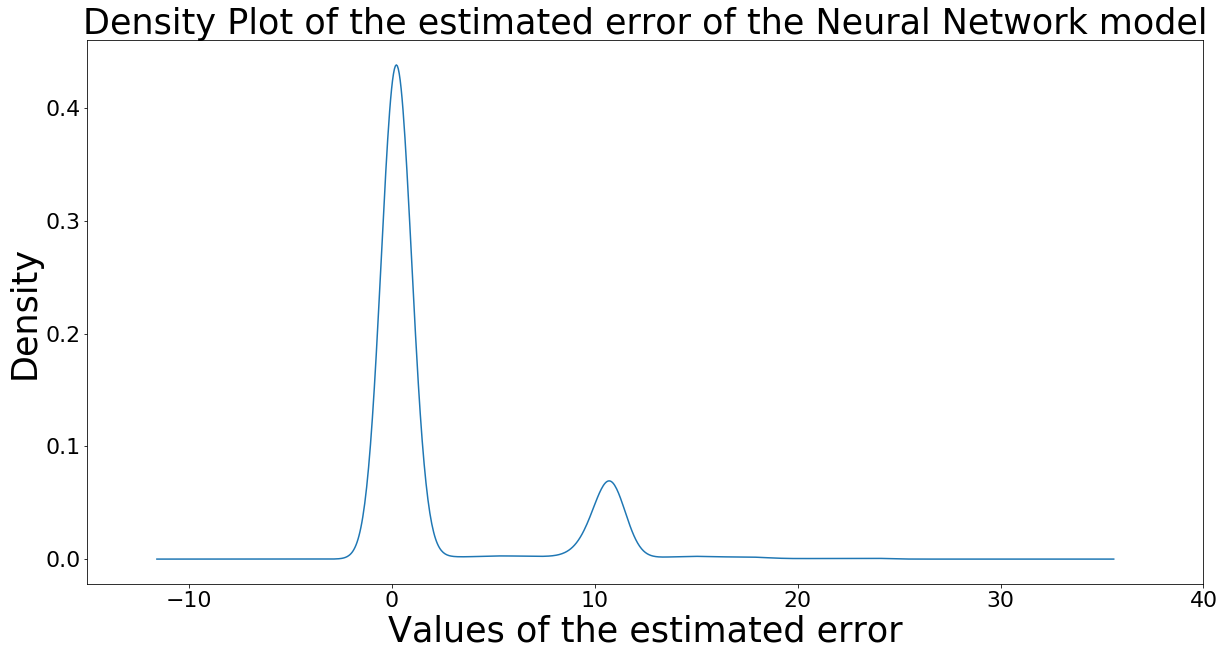

In [50]:
estimated_error_NN = [abs(y_test.tolist()[i] - y_pred_NN[i]) for i in range(len(y_test)) ]
plotDensity(estimated_error_NN)
plt.xlim(-15,40)
plt.title('Density Plot of the estimated error of the Neural Network model',fontsize=35)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

Text(0, 0.5, 'Counts')

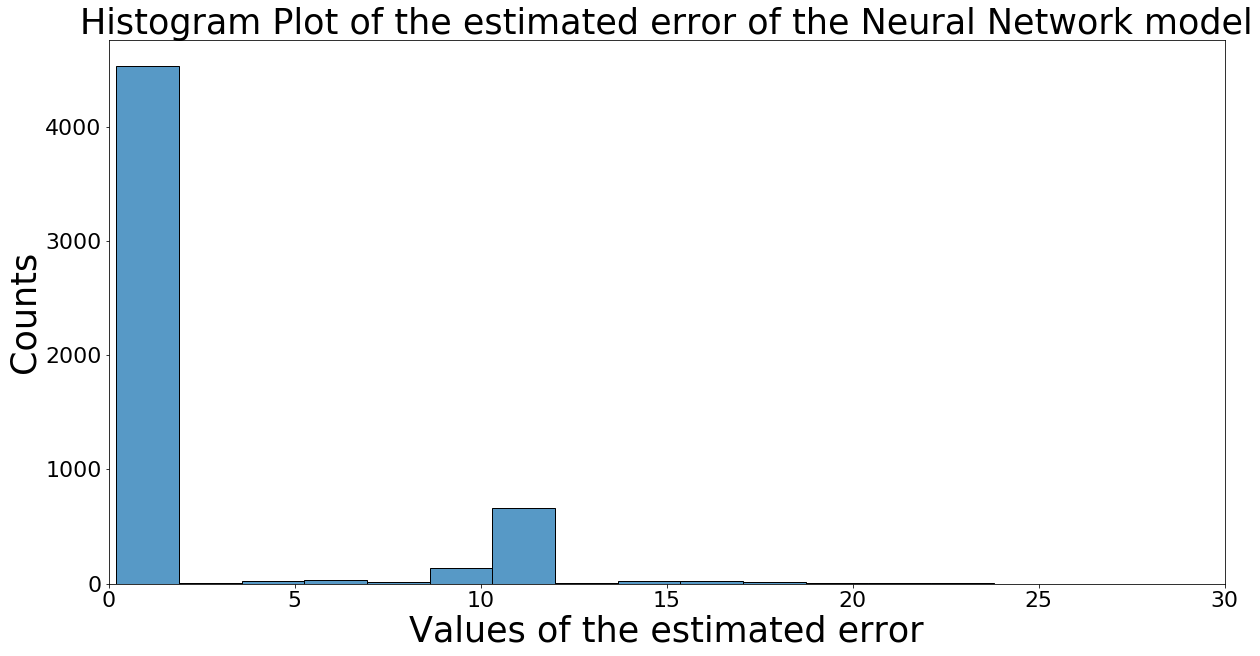

In [51]:
plt.figure(figsize=(20,10))
sns.histplot(estimated_error_NN).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})
plt.title('Histogram Plot of the estimated error of the Neural Network model',fontsize=35)
plt.xlabel('Values of the estimated error',fontsize=35)
plt.ylabel('Counts',fontsize=35)

/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


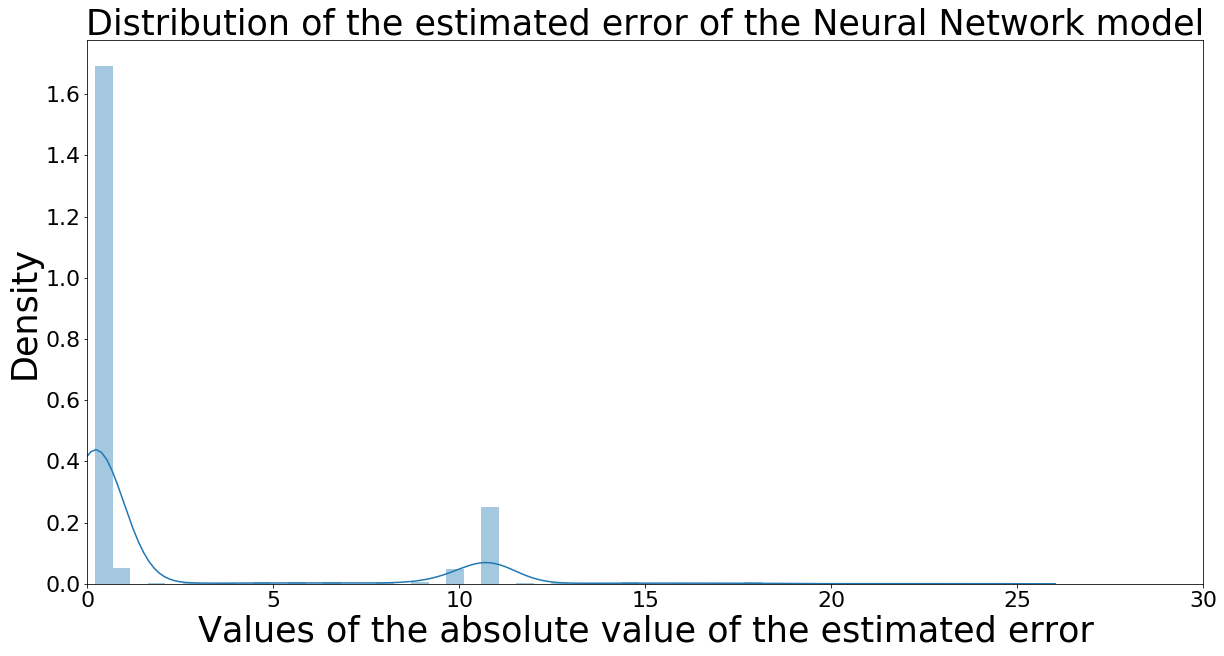

In [659]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

sns.distplot(estimated_error_NN).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Distribution of the estimated error of the Neural Network model',fontsize=35)
plt.xlabel('Values of the absolute value of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

plt.show()

# Task III - Studying the Impact of Data Pre-processing and Outlier Removal on the PredictionAccuracy

## Effect of preprocessing (7 Matrices )

In [26]:
X_in = X_df[X_df.columns[2:]].astype(float)
X_1 = norm_L2_column(X_in)
X_2 = norm_L2_row(X_in)
X_3 = norm_0_1_column(X_in)
X_4 = norm_0_1_row(X_in)
X_5 = norm_standardized_column(X_in)
X_6 =  norm_standardized_row(X_in)

X_1 = pd.DataFrame(X_1, columns = X_in.columns, index=X_in.index)
X_2 = pd.DataFrame(X_2, columns = X_in.columns, index=X_in.index)
X_3 = pd.DataFrame(X_3, columns = X_in.columns, index=X_in.index)
X_4 = pd.DataFrame(X_4, columns = X_in.columns, index=X_in.index)
X_5 = pd.DataFrame(X_5, columns = X_in.columns, index=X_in.index)
X_6 = pd.DataFrame(X_6, columns = X_in.columns, index=X_in.index)

datasets ={
    #'original': X_in,
          'L2 normalization by column': X_1,
          'L2 normalization by row': X_2,
          'Min-max normalization by column': X_3,
          'Min-max normalization by row': X_4,
           'Standardization by column': X_5,
           'Standardization by row': X_6
          }

for d in datasets.keys():
    print(d)
    X = datasets[d]
    X_16features, features_selected=select_features(X.values, y.values, X.columns, 100)
    datasets[d]= datasets[d][features_selected]


KeyboardInterrupt: 

In [ ]:
with open('train_test.pickle','rb') as f:
    indexes= pickle.load(f)
 
def splitTrainTest(X,y, indexes):
    X_train = X[X.index.isin(indexes['train_index'])]
    X_test = X[X.index.isin(indexes['test_index'])]
    y_train = y[y.index.isin(indexes['train_index'])]
    y_test = y[y.index.isin(indexes['test_index'])]

    X_test = X_test.sort_index()
    y_test = y_test.sort_index()
    return X_train, X_test, y_train, y_test


In [206]:
splitDatasets ={k: splitTrainTest(datasets[k], y, indexes) for k in datasets.keys()}

In [207]:
results={}
for d in splitDatasets.keys():
    results[d] ={}
    X_train, X_test, y_train, y_test = splitDatasets[d]
    
    LR = LinearRegression(n_jobs=-1).fit(X_train, y_train)
    y_pred_LR = [round(a, 3) for a in LR.predict(X_test)]
    nmae_LR = round(NMAE(y_test, y_pred_LR),3)
    results[d]['Linear regression'] = nmae_LR
    
    rf = RandomForestRegressor(n_estimators= 200,
                             min_samples_split=2,
                             min_samples_leaf= 1,
                             max_features='sqrt',
                             max_depth= 50,
                             bootstrap= False, n_jobs=-1)


    rf.fit(X_train, y_train)
    y_pred_RF = [round(a,3) for a in rf.predict(X_test)]
    nmae_RF = round(NMAE(y_test, y_pred_RF),3)
    results[d]['Random Forest Regression'] = nmae_RF
    
    
    nn_model =createmodel(2, 10, 0.1)
    nn_model.fit(X_train, y_train, batch_size=1, epochs=20, validation_split=0.2, workers=-1)
   
    y_pred_NN =[ round(a, 3) for a in nn_model.predict(X_test).flatten()]
    nmae_nn = (NMAE(y_pred_NN, y_test.tolist()))
    results[d]['Neural network'] = nmae_nn
    pd.DataFrame(results).to_csv("Processing.csv")

Train on 10256 samples, validate on 2565 samples
Epoch 1/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0663 - accuracy: 0.6276 - mae: 2.0663 - val_loss: 2.3863 - val_accuracy: 0.5832 - val_mae: 2.3863
Epoch 2/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0524 - accuracy: 0.5526 - mae: 2.0524 - val_loss: 2.7616 - val_accuracy: 0.1836 - val_mae: 2.7616
Epoch 3/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0340 - accuracy: 0.5457 - mae: 2.0340 - val_loss: 2.2641 - val_accuracy: 0.6246 - val_mae: 2.2641
Epoch 4/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0330 - accuracy: 0.5347 - mae: 2.0330 - val_loss: 2.2598 - val_accuracy: 0.6589 - val_mae: 2.2598
Epoch 5/20
10256/10256 [==============================] - 18s 2ms/step - loss: 1.9879 - accuracy: 0.5561 - mae: 1.9879 - val_loss: 2.3688 - val_accuracy: 0.7236 - val_mae: 2.3688
Epoch 6/20
10256/10256 [==============================] 

Epoch 6/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0192 - accuracy: 0.6977 - mae: 2.0192 - val_loss: 2.4049 - val_accuracy: 0.7669 - val_mae: 2.4048
Epoch 7/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0190 - accuracy: 0.6975 - mae: 2.0190 - val_loss: 2.3762 - val_accuracy: 0.7669 - val_mae: 2.3761
Epoch 8/20
10256/10256 [==============================] - 18s 2ms/step - loss: 2.0147 - accuracy: 0.6986 - mae: 2.0147 - val_loss: 2.3762 - val_accuracy: 0.7669 - val_mae: 2.3761
Epoch 9/20
10256/10256 [==============================] - 19s 2ms/step - loss: 2.0335 - accuracy: 0.6843 - mae: 2.0335 - val_loss: 2.7022 - val_accuracy: 0.0222 - val_mae: 2.7022
Epoch 10/20
10256/10256 [==============================] - 19s 2ms/step - loss: 2.0314 - accuracy: 0.6863 - mae: 2.0314 - val_loss: 2.3331 - val_accuracy: 0.7669 - val_mae: 2.3332
Epoch 11/20
10256/10256 [==============================] - 19s 2ms/step - loss: 2.0110 - accuracy: 0.702

In [209]:
pd.DataFrame(results)

,L2 normalization by column,L2 normalization by row,Min-max normalization by column,Min-max normalization by row,Standardization by column,Standardization by row
Linear regression,0.108000,0.11200,0.108000,0.106000,0.108000,0.106000
Neural network,0.092284,0.08161,0.081466,0.084701,0.082015,0.081664
Random Forest Regression,0.066000,0.08000,0.066000,0.084000,0.065000,0.082000


In [ ]:
res =pd.DataFrame(results)
# res.to_csv("Processing.csv")
res

## Remove outliers

In [111]:
#Preprocessing
X_standard = norm_standardized_column(X_df[X_df.columns[2:]].values.astype(float))
X_standard = pd.DataFrame(X_standard, columns = X_df.columns[2:], index=X_df.index)
X_standard

,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,0_cpu0_.idle,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,-1.309217,-1.154992,1.268253,-0.235101,1.297270,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.519496,-1.538417,-1.556672,-1.262481,-1.592964,-1.265620,-1.262825,-1.556738,-1.266031,-1.648555
1,0.372331,0.594872,-0.722263,-0.235101,-0.460117,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.538519,-1.566628,-1.575510,-1.271813,-1.613801,-1.274463,-1.271379,-1.575577,-1.274183,-1.671524
2,-0.561863,-1.154992,1.268253,-0.235101,0.883767,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.549745,-1.564253,-1.580619,-1.273369,-1.619867,-1.272851,-1.273712,-1.580686,-1.273262,-1.678486
3,0.372331,-1.154992,-0.722263,-0.235101,0.883767,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.549404,-1.567433,-1.584131,-1.274146,-1.623015,-1.275499,-1.273712,-1.584199,-1.275219,-1.681727
4,-1.309217,-0.571704,1.268253,-0.235101,0.883767,-0.137961,-0.245710,1.944610,-0.025604,-1.445730,...,-2.549034,-1.565988,-1.581577,-1.270258,-1.620910,-1.269604,-1.270601,-1.581644,-1.270015,-1.679353
5,0.372331,-1.884102,-0.722263,-0.235101,1.297270,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.477320,-1.530445,-1.514526,-1.237595,-1.553077,-1.237019,-1.237161,-1.514590,-1.236739,-1.602910
6,-1.309217,-1.154992,-0.722263,-0.235101,1.710773,-0.137961,-0.245710,1.944610,-0.025604,-1.445730,...,-2.521111,-1.555724,-1.554757,-1.261703,-1.591520,-1.263202,-1.262047,-1.554823,-1.263613,-1.646182
7,-0.561863,0.011584,-0.722263,-0.235101,0.470265,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.512760,-1.548526,-1.546455,-1.252371,-1.583324,-1.252137,-1.251937,-1.546521,-1.251857,-1.636205
8,-0.561863,-1.154992,1.268253,-0.235101,0.883767,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-1.788233,-1.318989,-0.913943,-1.011286,-0.913595,-0.994143,-1.010856,-0.919727,-0.993791,-0.984956
9,-0.561863,0.594872,-0.722263,-0.235101,0.056762,-0.137961,-0.245710,-0.492374,-0.025604,0.564647,...,-2.343092,-1.494098,-1.489302,-1.233706,-1.521038,-1.235568,-1.231717,-1.483618,-1.233768,-1.566557


In [117]:
# we take the standardized by column ==> X_5

cnt =0
T =0
outliers={}
X_standard_abs = X_standard.abs()
rangeOfValues = list(range(10,110, 10 )) 
# rangeOfValues = list(range(0,int(X_standard_abs.max().max()), 10 )) 
# rangeOfValues = np.append(rangeOfValues,X_standard_abs.max().max())
for T in rangeOfValues:
    #count number of samples where the components has a value higher than a threshhold ==> outlier 
    # if threshold bigger, less outliers
    cnt = X_standard_abs.shape[0]-len(X_standard_abs.index[((X_standard_abs<=T).sum(axis=1)==len(X_standard_abs.columns))].values)
    outliers[T] = cnt
    print(T, cnt)

outliers

10 8456
20 1687
30 645
40 402
50 234
60 128
70 74
80 49
90 43
100 26


{10: 8456,
 20: 1687,
 30: 645,
 40: 402,
 50: 234,
 60: 128,
 70: 74,
 80: 49,
 90: 43,
 100: 26}

Text(0, 0.5, 'Number of outliers')

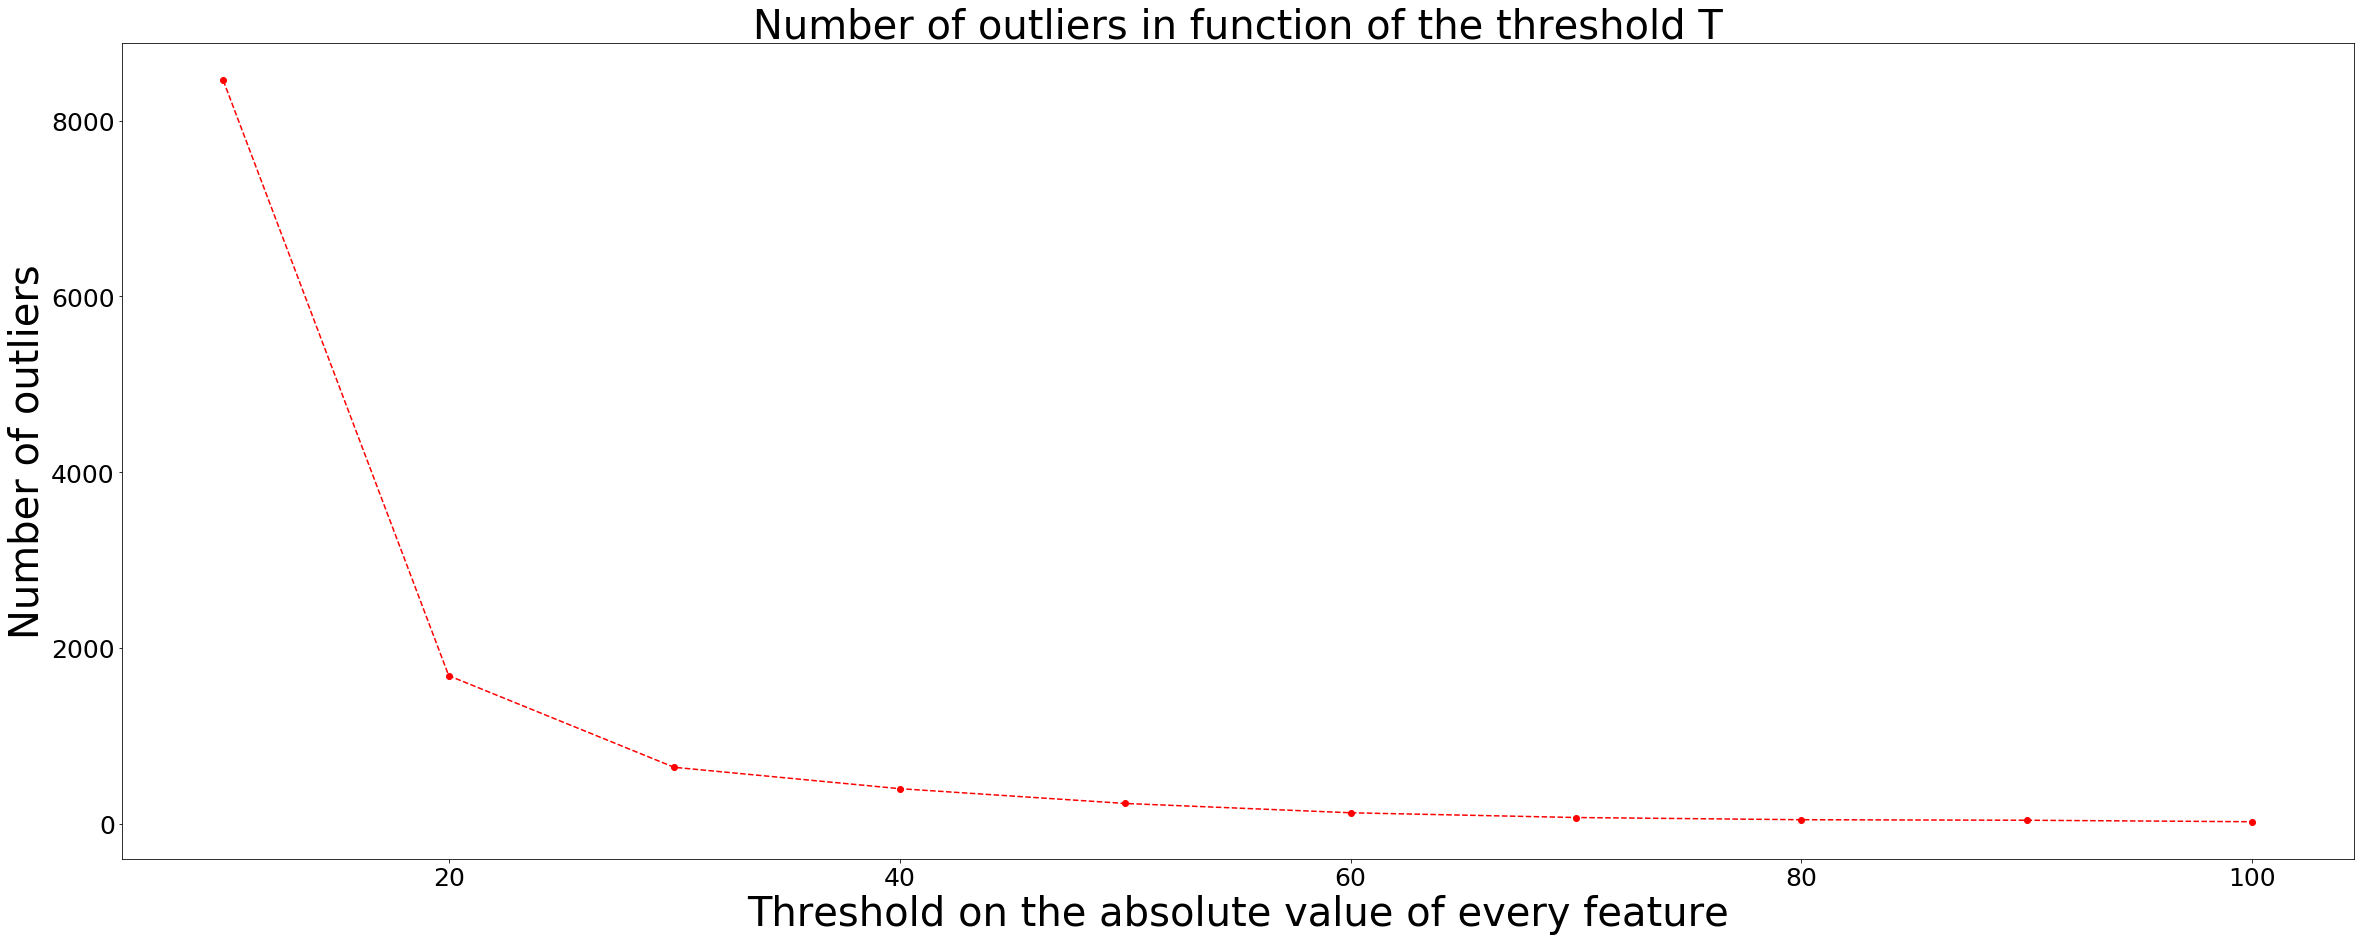

In [166]:
plt.figure(figsize=(40,15))
plt.plot(outliers.keys(), outliers.values(), '--ro')

# plt.legend(['Number of outliers'])
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}

plt.rcParams.update(params)
plt.title('Number of outliers in function of the threshold T', fontsize=40)
plt.xlabel('Threshold on the absolute value of every feature',fontsize=40)
plt.ylabel('Number of outliers',fontsize=40)

In [94]:
# we take the standardized by column ==> X_5

cnt =0
T =0
outliers2={}

rangeOfValues = list(range(10,110, 10 )) 
NMAE_T ={}
for T in rangeOfValues:
    print(T)
    
    #Preprocessing
    X_standard = norm_standardized_column(X_df[X_df.columns[2:]].values.astype(float))
    X_standard = pd.DataFrame(X_standard, columns = X_df.columns[2:], index=X_df.index)
    X_standard_abs = X_standard.abs()

    #count number of samples where the components has a value higher than a threshhold
    #First remove outliers
    indexes = X_standard_abs[((X_standard_abs<=T).sum(axis=1)==len(X_standard_abs.columns))].index

    #Perform feature selection
    X_16features, features_selected=select_features(X_standard_abs[X_standard_abs.index.isin(indexes)].values, y[indexes.tolist()].values, X_standard_abs.columns, 100)
    print(features_selected)

    #Split 
    X_lessfeatures = X_standard_abs[features_selected].astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X_lessfeatures, y, test_size=0.3, random_state=42)

    X_test = X_test.sort_index()
    y_test = y_test.sort_index()



    print(T, X_train.shape, y_train.shape)
    if X_train.shape[0]!=0:
        rf = RandomForestRegressor(n_estimators= 200,
                                     min_samples_split=2,
                                     min_samples_leaf= 1,
                                     max_features='sqrt',
                                     max_depth= 50,
                                     bootstrap= False, n_jobs=-1)


        rf.fit(X_train, y_train)
        y_pred_RF = rf.predict(X_test)
        nmae_RF = round(NMAE(y_test, y_pred_RF),3)
        print("T ={}, #outliers in training ={}, NMAE={}".format(T, outliers2[T], nmae_RF))
        NMAE_T[T]= nmae_RF
    else: 
        NMAE_T[T]= 'none'

               

10
Index(['2_kbcommit', '2_totsck', '3_plist.sz', '3_tcpsck', '4_kbcommit',
       '4_X..commit', '4_plist.sz', '4_ldavg.1', '4_tcpsck', '5_totsck',
       '5_tcpsck', '0_TxBytes', '36_TxBytes', '0_TxPacktes.1',
       '21_RxPacktes.1', '36_TxPacktes.1'],
      dtype='object')
10 (12821, 16) (12821,)
T =10, #outliers in training =0, NMAE=0.078
20
Index(['2_kbcommit', '2_totsck', '3_kbcommit', '3_X..commit', '3_file.nr',
       '3_plist.sz', '3_ldavg.1', '3_tcpsck', '4_plist.sz', '4_ldavg.1',
       '4_tcpsck', '5_totsck', '5_tcpsck', '21_RxBytes', '29_RxPacktes.1',
       '34_RxPacktes.1'],
      dtype='object')
20 (12821, 16) (12821,)
T =20, #outliers in training =0, NMAE=0.069
30
Index(['2_kbcommit', '3_i130_intr.s', '3_kbcommit', '3_X..commit', '3_file.nr',
       '3_plist.sz', '3_ldavg.1', '3_totsck', '4_X..commit', '4_plist.sz',
       '4_ldavg.1', '4_tcpsck', '5_totsck', '21_RxBytes', '21_RxPacktes.1',
       '41_RxPacktes.1'],
      dtype='object')
30 (12821, 16) (12821,)
T =30,


oulierRF ={10:0.078,
20:0.069,
30:0.07,
40:0.064,
50:0.073,
60:0.077,
70:0.068,
80:0.068,
90:0.069,
100:0.066}

# Task IV - Predicting the Distribution of Target Variables using Histograms

## Reloading the data

In [79]:
X_df = pd.read_csv("X.csv")
Y_df = pd.read_csv("Y.csv")
target="DispFrames"
y=Y_df[target]
X_in = X_df[X_df.columns[2:]].astype(float)

## Keeping the values between 0.5 and 30.5 as instructed

In [80]:
#considering only values between 0.5 and 30.5

allowed = y[y>=0.5][y<=30.5].index

X_in = X_in[X_in.index.isin(allowed)]
y= y[allowed]

X_in = X_in.reset_index()[X_in.columns]
y = y.reset_index().DispFrames

## Standardizing by column

In [81]:
X_5 = norm_standardized_column(X_in)
X_5 = pd.DataFrame(X_5, columns = X_in.columns, index=X_in.index)

In [82]:
X_5.shape, y.shape

((18292, 1670), (18292,))

## Selecting T to keep 99% of the samples

In [83]:
# perform outlier removal to keep 99%

# we take the standardized by column ==> X_5

#count is the number of data still there
for T in list(range(1, 60, 1))[::-1]:
    cnt = len(X_5.index[((X_5<=T).sum(axis=1)==len(X_5.columns))].values)
    print(cnt,X_5.shape[0]*0.99, T)
    if cnt<X_5.shape[0]*0.99:
        print(T)
        break 

18161 18109.079999999998 59
18160 18109.079999999998 58
18158 18109.079999999998 57
18153 18109.079999999998 56
18119 18109.079999999998 55
18111 18109.079999999998 54
18105 18109.079999999998 53
53


In [84]:
T=53
indexes = X_5[((X_5<=T).sum(axis=1)==len(X_5.columns))].index
X_5[X_5.index.isin(indexes)].shape

(18105, 1670)

In [85]:
X_5_no_outlier = X_5[X_5.index.isin(indexes)]
y_no_outlier = y[indexes]

## Performing feature selection 

In [86]:
_, features_selected=select_features(X_5_no_outlier.values, y_no_outlier.values, X_5_no_outlier.columns, 100)
X_5_no_outlier= X_5_no_outlier[features_selected]

## Creating and assigning the bins

In [87]:
#Create bins:  y ∈[0.5, 30.5] with a bin size of 1. This results in 30 bins, with mid points 1, 2, .., 30.
def round_here(x, mappingVerification):
       for (a,b) in mappingVerification.keys():
            if x>=a and x<b:
                return mappingVerification[(a,b)]

mappingVerification = {(0.5+i, 0.5+i+1): i+1 for i in range(30)}
X_5_no_outlier=X_5_no_outlier.reset_index()[X_5_no_outlier.columns]
y_no_outlier = y_no_outlier.reset_index()["DispFrames"]

## Splitting 70/30

In [88]:

import pickle

# X_train, X_test, y_train, y_test = train_test_split(X_5_no_outlier, y_no_outlier, test_size=0.3, random_state=42)

# X_train = X_train.sort_index()
# y_train = y_train.sort_index()
# X_test = X_test.sort_index()
# y_test = y_test.sort_index()


# save=[X_train, X_test, y_train, y_test]
# with open('train_test_RFC.pickle','wb') as f:
#     pickle.dump( save,f,  4)
    

with open('train_test_RFC.pickle','rb') as f:
    X_train, X_test, y_train, y_test= pickle.load(f)
    
y_mapped_train = pd.DataFrame([ round_here(y_i,mappingVerification) for y_i in y_train])[0]
y_mapped_test = pd.DataFrame([ round_here(y_i,mappingVerification) for y_i in y_test])[0]

# X_train = X_in[X_in.index.isin(indexes['train_index'])]
# X_test = X_in[X_in.index.isin(indexes['test_index'])]
# y_train = y[y.index.isin(indexes['train_index'])]
# y_test = y[y.index.isin(indexes['test_index'])]

# X_test = X_test.sort_index()
# y_test = y_test.sort_index()

## Hyperparameter tuning of the RF classifier

In [ ]:
#Consider each bin of the histogram as a separate class and use a random forest classifier to predict the density for each class.


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  make_scorer
score = make_scorer(NMAE, greater_is_better=False) #metric to optimize

n_estimators = [ 100, 200, 300]
max_features = ['auto', 'sqrt'] 
max_depth = [40, 70, None]
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4] 
bootstrap = [True, False]
random_grid_classifier = {
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_classifier,  cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring =score)

rf_random.fit(X_train, y_train )
print(rf_random.best_params_)

In [89]:
classifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth= 40, bootstrap= False)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
#predicting the distribution
distributions = classifier.predict_proba(X_test)

In [91]:
#computing the expectations

def computeExpectation(classifier,result):
    return np.sum([result[i]*classifier.classes_[i] for i in range(len(result))])

y_predicted_Histogram = [ computeExpectation(classifier, distributions[i]) for i in range(len(distributions))]

/home/joseph/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


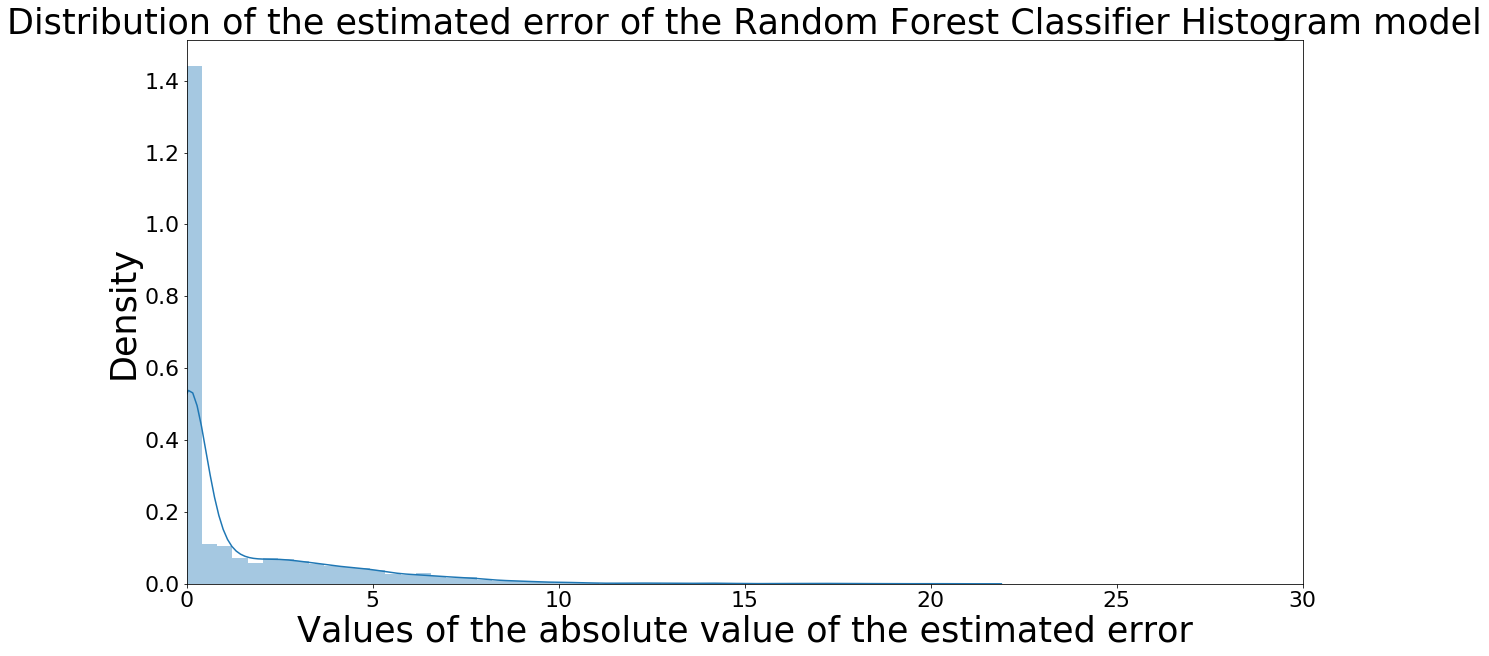

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
estimated_error_Histogram = [abs(y_predicted_Histogram[i]- (y_test.tolist())[i]) for i in range(len(y_test))]
sns.distplot(estimated_error_Histogram).set(xlim=(0,30))
matplotlib.rcParams.update({'font.size': 22})

plt.title('Distribution of the estimated error of the Random Forest Classifier Histogram model',fontsize=35)
plt.xlabel('Values of the absolute value of the estimated error',fontsize=35)
plt.ylabel('Density',fontsize=35)

plt.show()

In [162]:
print("NMAE computed on expectations on test set: {}".format(NMAE(y_test, y_predicted_Histogram)))

NMAE computed on expectations on test set: 0.06813765780112227


In [190]:
#randomly sampling two points and plotting histograms

randoms =X_test.sample(2).sort_index()
distributions_random = classifier.predict_proba(randoms.values)
y_predicted_random = [ computeExpectation(classifier, distributions_random[i]) for i in range(len(distributions_random))]
y_actual = y_test[y_test.index.isin(sorted(randoms.index.tolist()))]
y_actual,y_predicted_random

(12431    13
 15611    24
 Name: DispFrames, dtype: int64, [15.28, 23.189999999999998])

[23.96, 19.89]

Text(0.5, 1.0, 'Predicted Histogram of a random sample with target value equal to "13"')

<Figure size 2880x720 with 0 Axes>

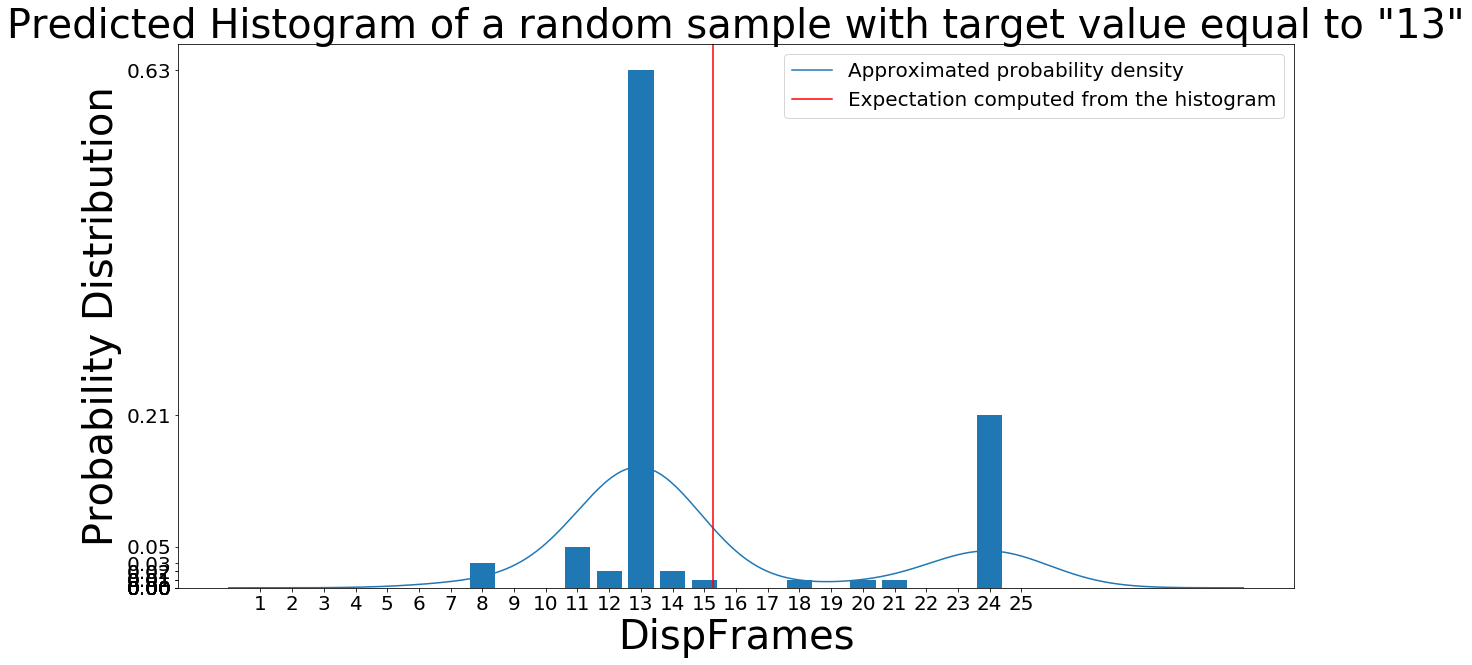

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
probability = distributions_random[0]
expectation =computeExpectation(classifier, distributions_random[0])

names = classifier.classes_
data =  []
for i in range(len(names)):
    for j in range(int(probability[i]*100)):
        data.append(names[i])
pd.DataFrame(data).plot(kind='density',figsize=(20,10),legend=None)
plt.axvline(x=expectation, c='r')
plt.legend(['Approximated probability density', "Expectation computed from the histogram"])
plt.bar(names, probability)

plt.xticks(names, fontsize=20)
plt.yticks(probability, fontsize=20) #This may be included or excluded as per need
plt.xlabel('DispFrames', fontsize=40)
plt.ylabel('Probability Distribution', fontsize=40)
plt.title('Predicted Histogram of a random sample with target value equal to "{}"'.format(y_actual.iloc[0]), fontsize=40)

Text(0.5, 1.0, 'Predicted Histogram of a random sample with target value equal to "24"')

<Figure size 2880x720 with 0 Axes>

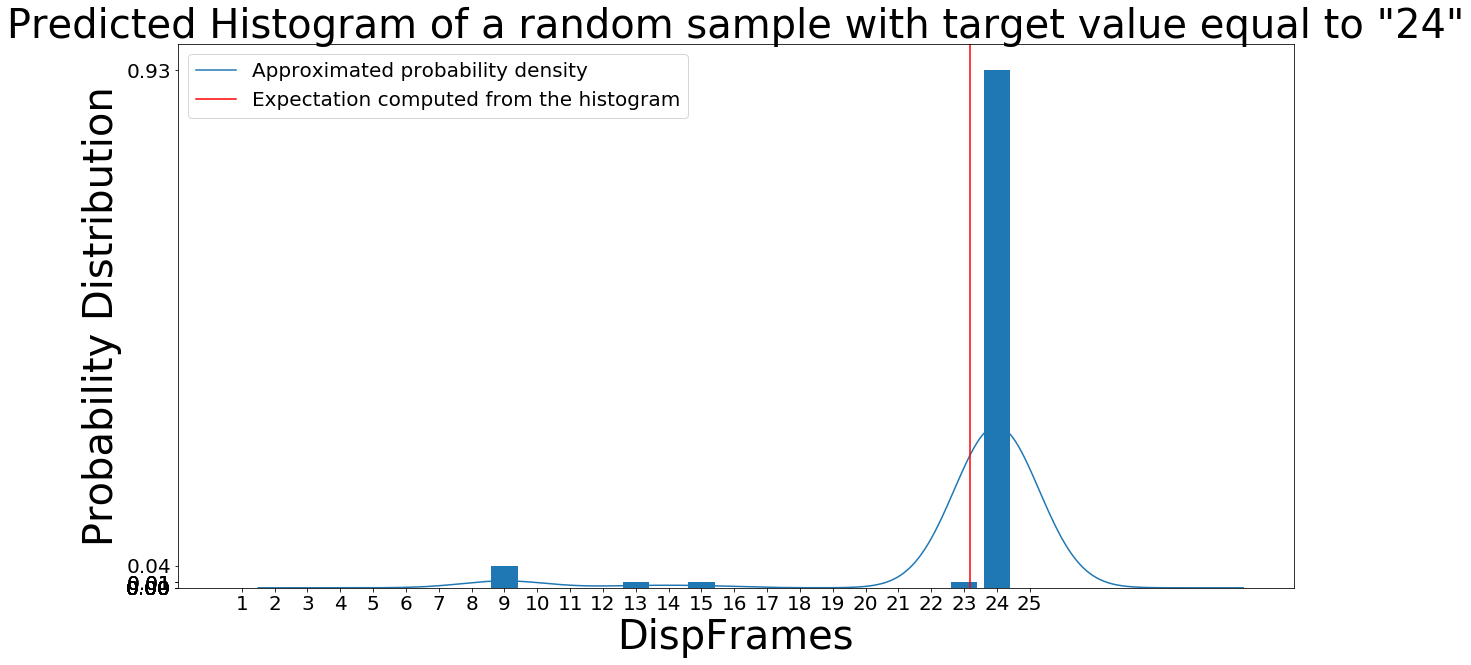

In [265]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
probability = distributions_random[1]
expectation =computeExpectation(classifier, distributions_random[1])

names = classifier.classes_
data =  []
for i in range(len(names)):
    for j in range(int(probability[i]*100)):
        data.append(names[i])
pd.DataFrame(data).plot(kind='density',figsize=(20,10),legend=None)
plt.bar(names, probability)
plt.axvline(x=expectation, c='r')
plt.legend(['Approximated probability density', "Expectation computed from the histogram"])

plt.xticks(names, fontsize=20)
plt.yticks(probability, fontsize=20) #This may be included or excluded as per need
plt.xlabel('DispFrames', fontsize=40)
plt.ylabel('Probability Distribution', fontsize=40)
plt.title('Predicted Histogram of a random sample with target value equal to "{}"'.format(y_actual.iloc[1]), fontsize=40)

# Task 5

In [271]:
from datetime import datetime
X_3600 = X_5_no_outlier
Y_3600= Y_df[ Y_df.index.isin(y_no_outlier.index)]

X_3600 = X_3600[:3040]
Y_3600 = Y_3600[:3040]

Y_3600["TS"] = Y_3600["TimeStamp"].map(lambda x: datetime.fromisoformat(x).timestamp())

In [272]:
distributionsTraining= classifier.predict_proba(X_3600)
a_ms_25= []
approx_25 =[]
q=0.2
for j in range(len(distributionsTraining)):

    pdf = np.append([0],distributionsTraining[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    a_ms_25.append(a_m)
    approx_25.append(Y_3600['DispFrames'].tolist()[j]<=a_m)


a_ms_5= []
approx_5=[]
q=0.5
for j in range(len(distributionsTraining)):

    pdf = np.append([0],distributionsTraining[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    a_ms_5.append(a_m)
    approx_5.append(Y_3600['DispFrames'].tolist()[j]<=a_m)


a_ms_95= []
approx_95=[]
q=0.95
for j in range(len(distributionsTraining)):

    pdf = np.append([0],distributionsTraining[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    a_ms_95.append(a_m)
    approx_95.append(Y_3600['DispFrames'].tolist()[j]<=a_m)
print('20, 50 and 95 percentiles on first hour', np.mean(approx_25),np.mean(approx_5),np.mean(approx_95))

20, 50 and 95 percentiles on first hour 0.12960526315789472 0.6776315789473685 0.906578947368421


/home/joseph/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/joseph/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


Text(0.5, 1.0, 'Predicted Histogram of a random sample with target value equal to "24"')

<Figure size 2880x720 with 0 Axes>

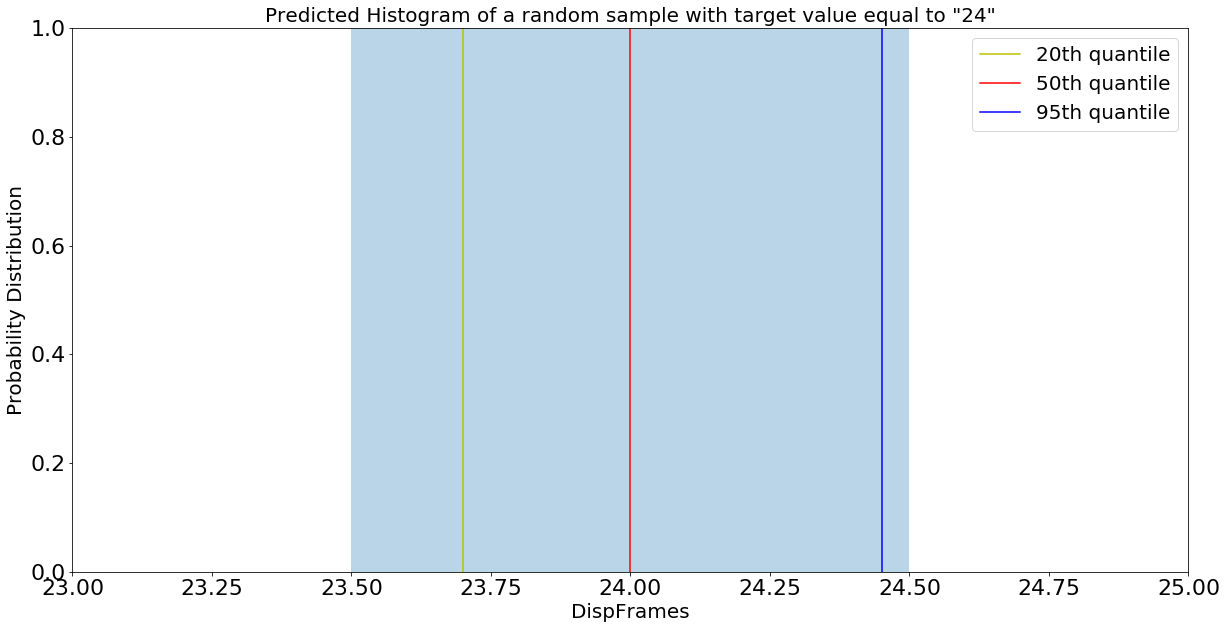

In [273]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
probability = distributionsTraining[0]
expectation =computeExpectation(classifier, distributionsTraining[0])
v_20 = a_ms_25[0]
v_5 = a_ms_5[0]
v_95 = a_ms_95[0]
names = classifier.classes_
data =  []
for i in range(len(names)):
    for j in range(int(probability[i]*100)):
        data.append(names[i])
        
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.set_xlim(xmin=23,  xmax=25)
ax.bar(names, probability, width=1, alpha=0.3)
ax.axvline(x=v_20, c='y')
ax.axvline(x=v_5, c='r')
ax.axvline(x=v_95, c='b')
ax.set_ylim(0,1)
plt.legend('')
# ax.xticks(names, fontsize=20)
# ax.yticks(probability, fontsize=20) #This may be included or excluded as per need
plt.legend(['20th quantile', '50th quantile', '95th quantile'])
plt.xlabel('DispFrames', fontsize=20)
plt.ylabel('Probability Distribution', fontsize=20)
plt.title('Predicted Histogram of a random sample with target value equal to "{}"'.format(y_actual.iloc[1]), fontsize=20)

Text(0, 0.5, 'DispFrames')

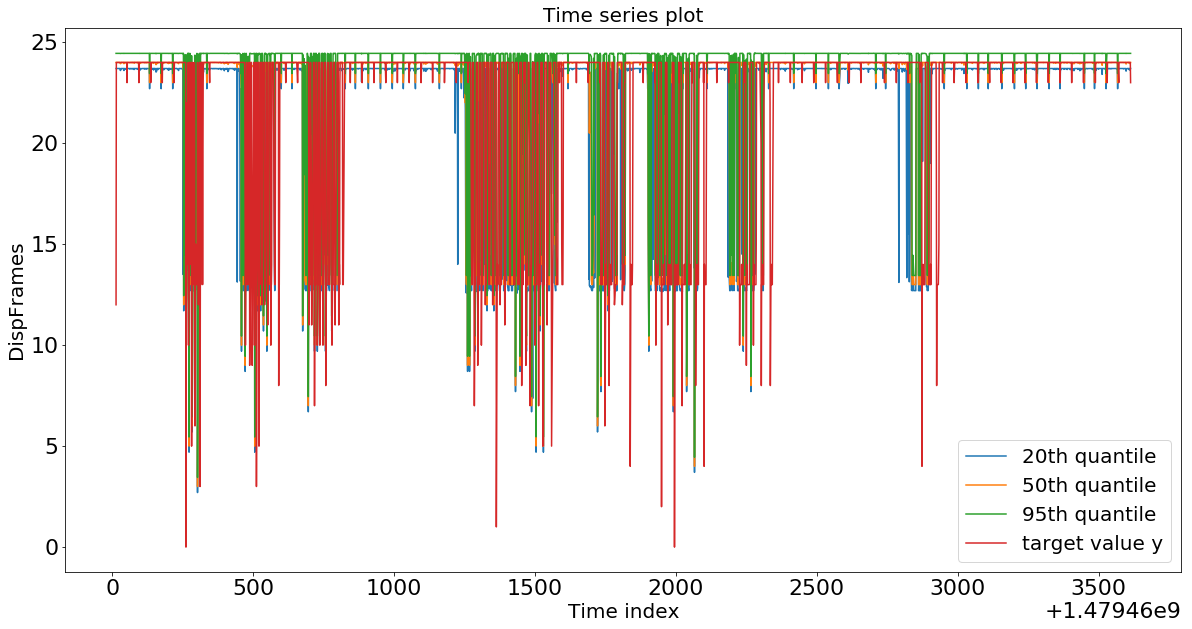

In [274]:
plt.figure(figsize=(20,10))
plt.plot(Y_3600["TS"], a_ms_25)
plt.plot(Y_3600["TS"], a_ms_5)
plt.plot(Y_3600["TS"], a_ms_95)
plt.plot(Y_3600["TS"], Y_3600['DispFrames'])

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,'font.size': 22}


plt.rcParams.update(params)
plt.legend(['20th quantile', '50th quantile', '95th quantile', 'target value y'])
plt.title('Time series plot', fontsize=20)
plt.xlabel('Time index',fontsize=20)
plt.ylabel('DispFrames',fontsize=20)

In [246]:
distributionsTesting = classifier.predict_proba(X_test)

In [268]:

i=0
a_ms= []
q=0.2
approx=[]
for j in range(len(distributionsTesting)):

    pdf = np.append([0],distributionsTesting[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    
    approx.append(y_test.tolist()[j]<=a_m)
    a_ms.append(a_m)
print("20 percentile on test set",  np.mean(approx))

20 percentile on test set 0.07161266568483063


In [267]:

i=0
a_ms= []
q=0.5
approx=[]
for j in range(len(distributionsTesting)):

    pdf = np.append([0],distributionsTesting[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    
    approx.append(y_test.tolist()[j]<=a_m)
    a_ms.append(a_m)
print("50 percentile on test set",  np.mean(approx))

50 percentile on test set 0.328240058910162


In [266]:

i=0
a_ms= []
q=0.95
approx=[]
for j in range(len(distributionsTesting)):

    pdf = np.append([0],distributionsTesting[j]+[0])
    cdf = np.cumsum(pdf)
    
    bin_boundaries = [0]+[n for n in classifier.classes_]+[26]
    k = max([i for i in range(len(cdf)) if cdf[i]<q])

    a_m = bin_boundaries[k]+0.5+1*(q-cdf[k])/(cdf[k+1]-cdf[k])
    
    approx.append(y_test.tolist()[j]<=a_m)
    a_ms.append(a_m)
print("95 percentile on test set",  np.mean(approx))

95 percentile on test set 0.9992636229749632
